# Quality Prediction of Red Wine - First Phase Project

## Project Description

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


Attribute Information
Input variables (based on physicochemical tests):
- fixed acidity 
- volatile acidity 
- citric acid 
- residual sugar
- chlorides 
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol
##### Output variable (based on sensory data):
- quality (score between 0 and 10)


What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.

### Let's Import majorly required Libraries and Later lets import based on requirements

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [2]:
# Lets Import Data set using the link given in the project description and read it to see number of Rows x Columns
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [3]:
#Lets check head of the DataFrame retrieved using df.head()
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
#Lets check tail of the DataFrame retrieved using df.head()
df.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

For the Model Building and finding issues with the data set at various locations and phases we need to do Exploratory Data Analysis (EDA). For that First, Let's start with Non-Graphical Analysis

# Exploratory Data Analysis (EDA)

## Non-Graphical Analysis

Since, we have collected the data from GitHub, and found that "Quality" is the target variable for us. and chosen that Classification is the problem. Let's go for finding out the details of all variables such as size, shape, information regarding NULL Values/Blank Space/White Spaces and clean them by using various methods

In [5]:
#Let's check the dimensions of the data set using shape 
df.shape

(1599, 12)

From this we understand that the data set contains 1599 Rows and 12 Columns of Information

In [6]:
#Let's check the names of the Columns for later usage
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
#checking the dimensions of the internet 
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

With this we could convert the DataFrame Columns to the List and checked

In [8]:
#Let's check the data types of the columns
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

From this, we can understand that, all the coulmns are having Numerical Data. 11 Columns contains Float type of Data and One Column contains int64 type. And we consider it as our Target variable since it is deciding the Quality of Red Wine

In [9]:
#Checking the Null Values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

It Shows that, there are no Null Values in any of the Column, but we can also re-check the count of Null Values from the entire DataFrame

In [10]:
#Check the Sum of NULL Values in the total DataFrame
df.isnull().sum().sum()

0

Now, It's Very clear that the entire DataFrame contains No Null Values

In [11]:
#Fetching the information about the DataFrame with Non Null Values and Data Type of the Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


It Gives the information that, all the 12 Columns have same number of values and they are all Non Null Values. All the columns are of Float Data Type and our Target Variable is alone INTEGER Data Type. Memory Usage of the DataSet is 150.0 KB. So, It's easy to work as there is no OBJECT Data Type

##### Let's check the unique values and all the information in each column

In [12]:
#Gives Unique Values
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

It can be understood that there are 6 unique types are there in QUALITY Column. In the similiar way we can find the unique values under each column. But we can use Value_counts function with a FOR Loop to find all details together

In [13]:
#Gives Total Number of Unique Values in our target variable
df['quality'].nunique()

6

In [14]:
#Checking the value counts of each Column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0

There are multiple unique values for each row and we can also see that the smallest value is 0.00 in the case of citric acid column.

<AxesSubplot:>

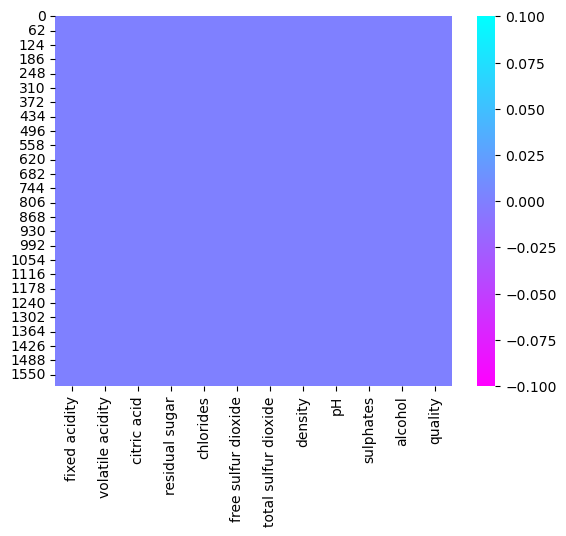

In [15]:
#Lets Visuliza using Heat Map to find out the presence of NULL Values
sns.heatmap(df.isnull(),cmap="cool_r")

From the above Heatmap we can identify that there are no null values in the Total Data set

Since, there are no categorical data, hence no need to separate them. we can apply all the operations using regular procedure

In [16]:
#Let's implement describe to return the description of the data in the DataFrame
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

Since, the describe() method is used to return the description of the data in the given DataFrame, we use it to find out the description of 
Numerical data which gives the final conclusion and information as follows in the each column
1) COUNT: The Counts of all coulmns are same without missing any data

2) MEAN: The Mean Value is greater than the Median(50%) in Fixed acidity, residual sugar, Chlorides,free sulfur dioxide and total sulfur dioxide which means Data is Skewed to right in these Columns 

3) The data in NO Column have mean value less than medain, it means data is NOT skewed to Left in any column

4) By Observing and summerizing the data we can observe that there is a huge difference between 75% and Max Value in the columns Residual Sugar, Free Sulfur Dioxide and Total Sulfur Dioxide hence there are Outliers in these columns and we need to remove them using ZSCORE Method.

5) We can also observe that the standard deviation is corrected sample standard deviation, 25% percentile are calculated in the describe method

In [17]:
# The dame can also be checked by using df.skew() method in evaluted model 
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

From the above results we can observe that the skewness information present in our dataset since the acceptable range is -0.5 to +0.5.
We knew that our target variable is QUALITY and hence we can ignore it as we should not try to remove SKEWNESS in it and also the range is within acceptable range. 
Now when we observe the skew results, in the features columns, we can conclude that fixed acidity, volatile acidity, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates and alcohol are all outside the acceptable range.
These values of skewness indicates that the outliers are present in our dataset and we need to be remove them if required.

## Data Visualization

Since, we find out the statistical summary of Numerical Columns, Skewness and Outliers information in the form of Numerical values, now lets go for putting the same in the form of Graphical analysis starting from depicting the Count of each values to all the other graphical findings.

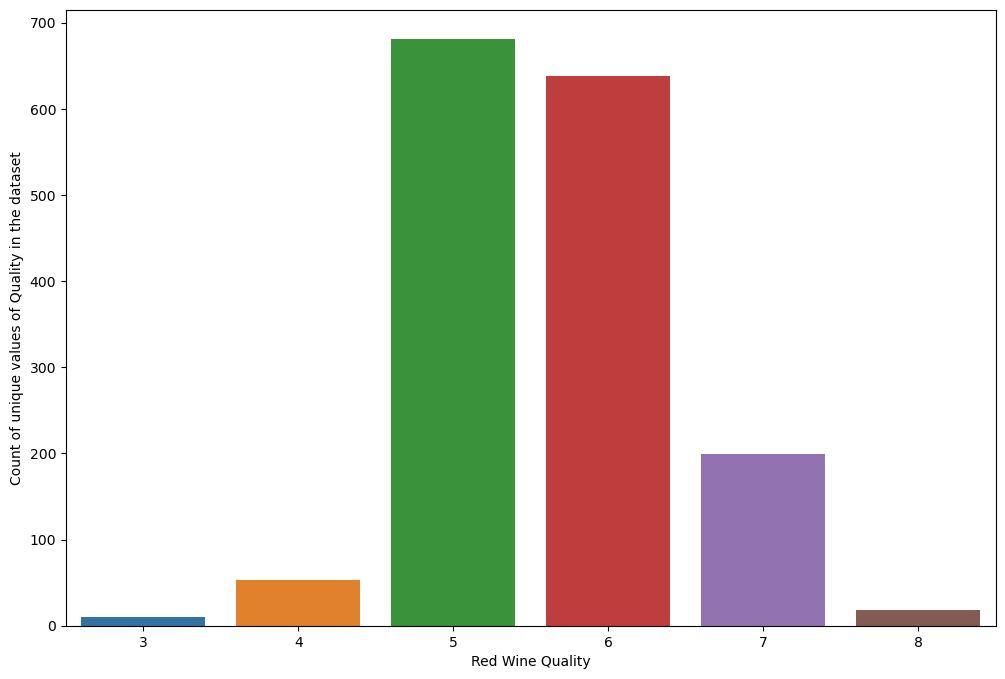

In [18]:
plt.figure(figsize=(12,8))
sns.countplot(x ='quality', data = df)
plt.xlabel('Red Wine Quality')
plt.ylabel('Count of unique values of Quality in the dataset')
plt.show()

From our above countplot representation of the Target varaible QUALITY, we see that the different ranges of red wine quality and their count of each unique value present for quality. The scores 5 and 6 are much higher than other ranges. It describes the Class Imbalance. It leads to biasness of the Machine Learning Model during the prediction. Hence it needs to be rectified using Over sampling Method. 
It can also be identified by using Correlation of the Dataset.

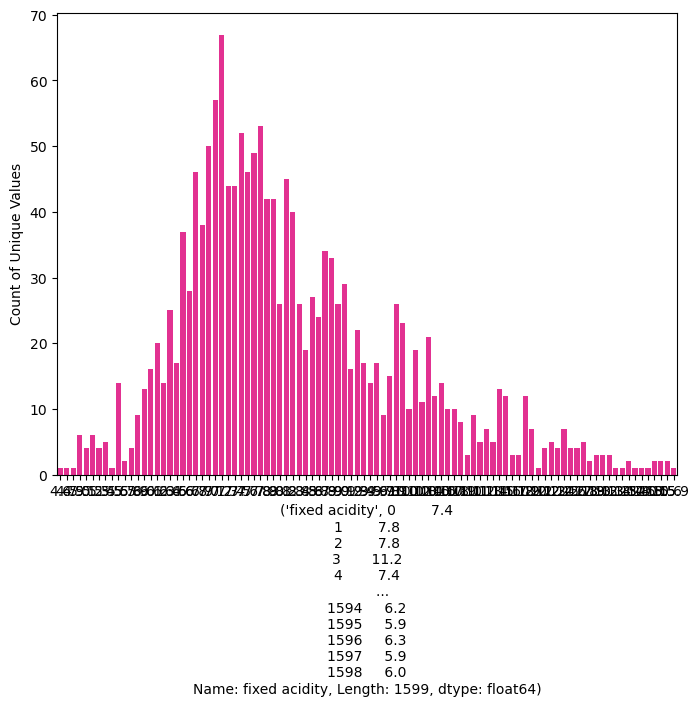

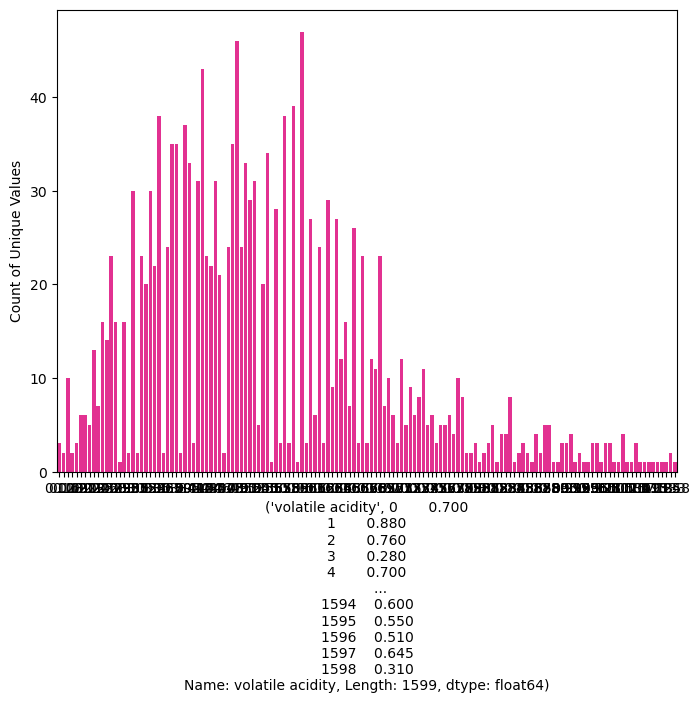

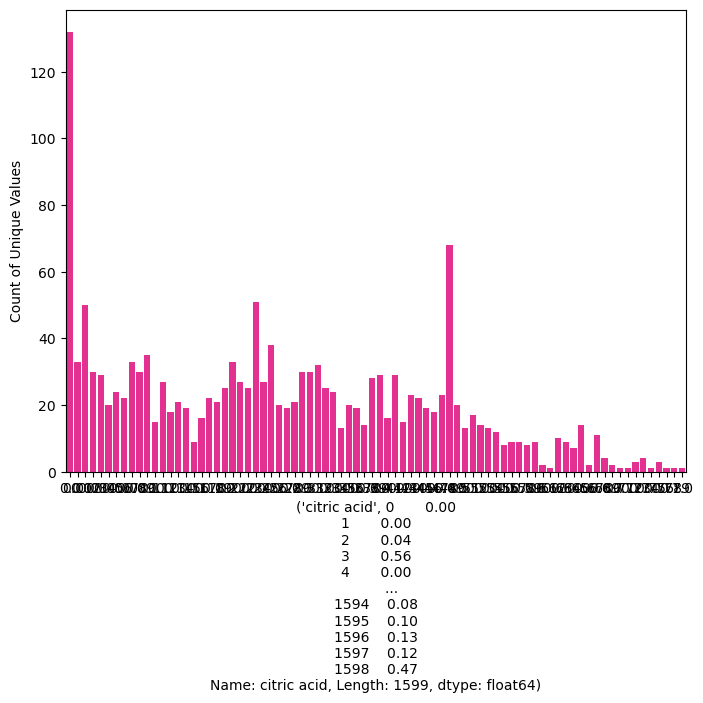

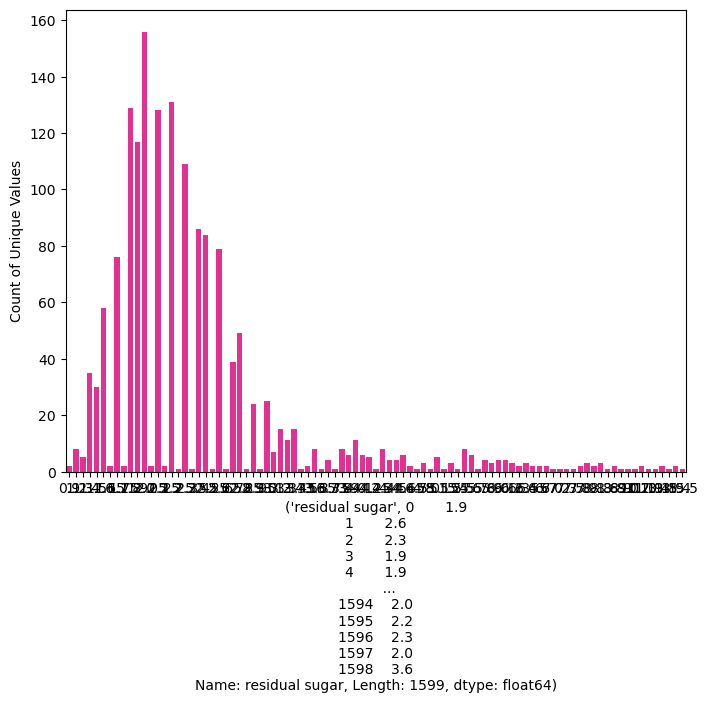

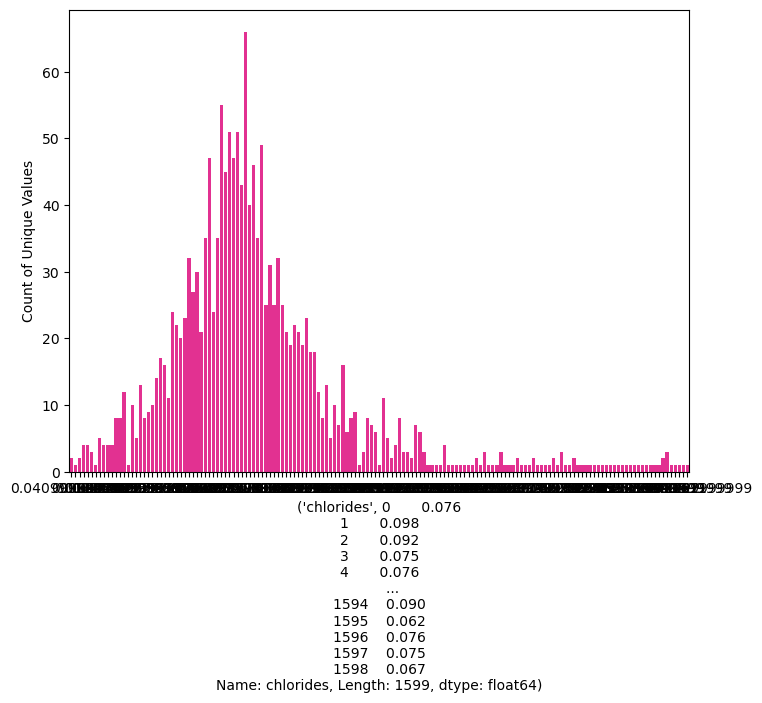

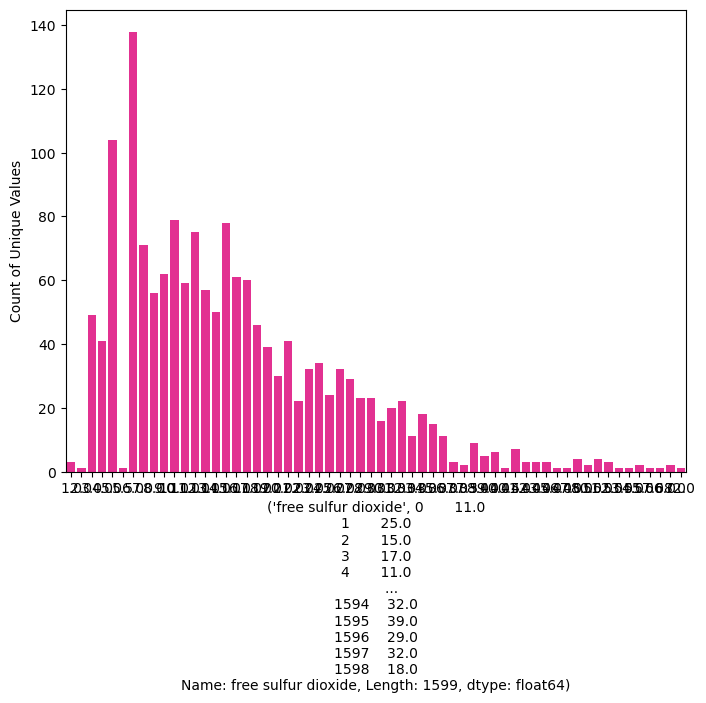

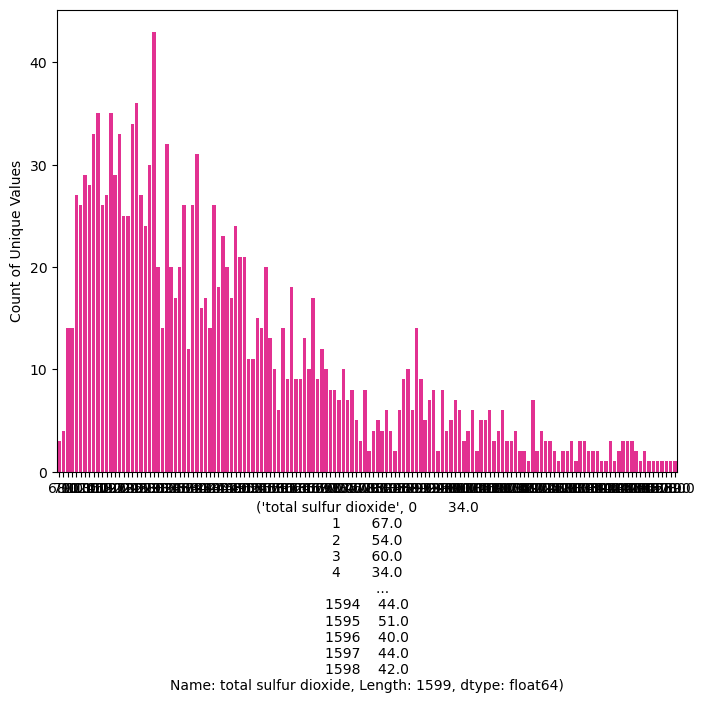

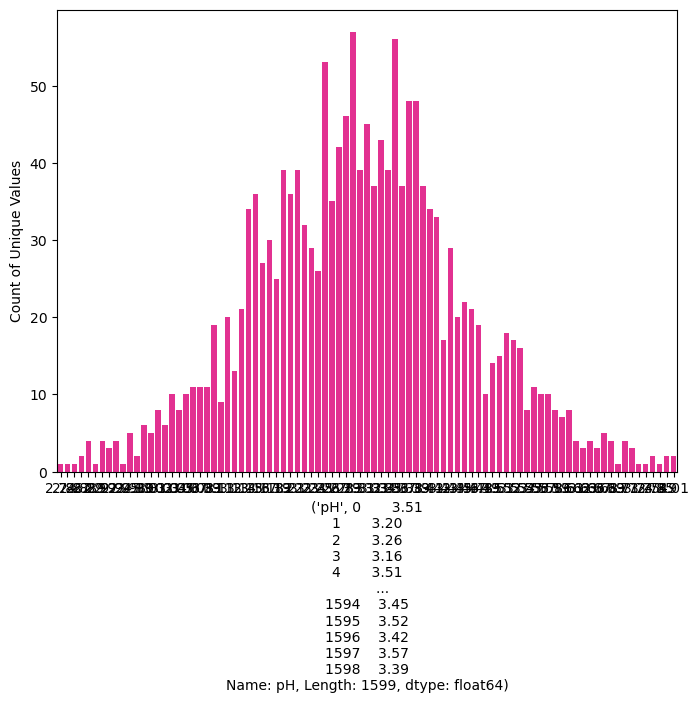

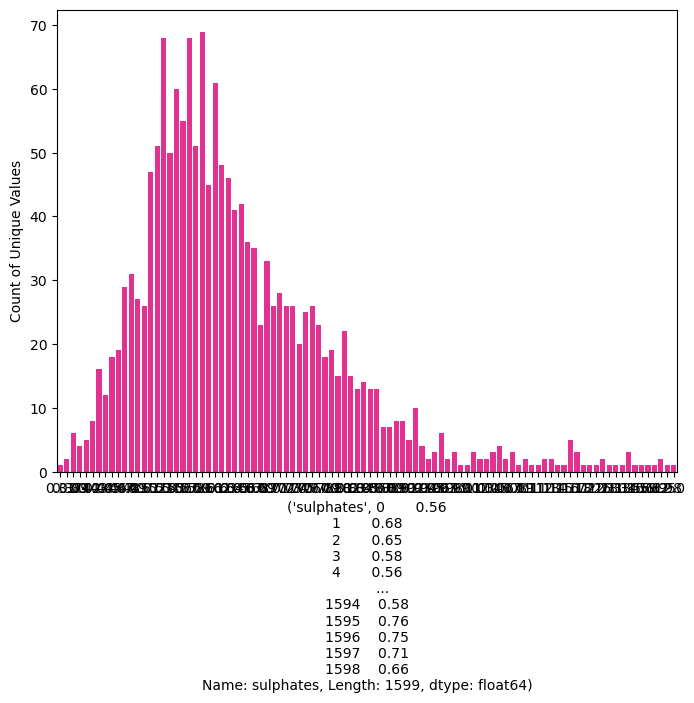

In [19]:
#Let's Plot Countplot for each column in the DataFrame
index=0
for col in df.items():
    plt.figure(figsize=(8,6))
    sns.countplot(x=col[index], data=df, color="deeppink")
    plt.xlabel(col)
    plt.ylabel('Count of Unique Values')
plt.tight_layout()
plt.show()

The Above all Count plots are just an example of showing the count of Unique values in each column of the DataFrame. we can see the skewness from distplot and outliers from the BOXPLOT. lets check them in the following plots.

#### BAR plots for identifying the increasing and decreasing patterns

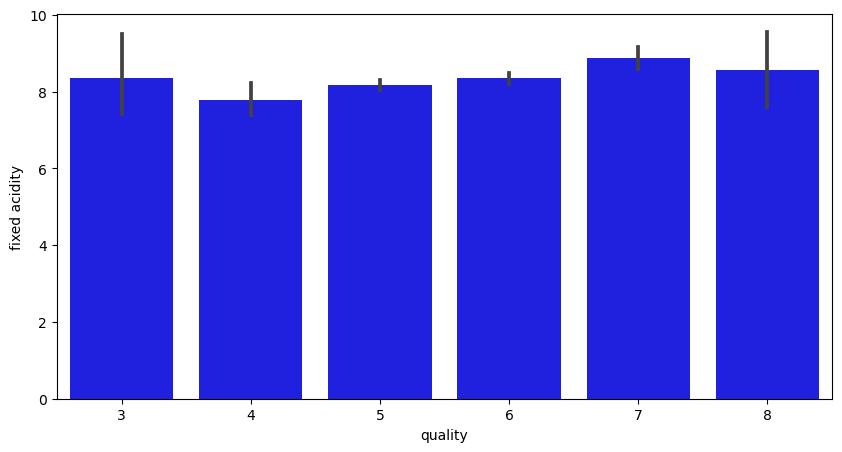

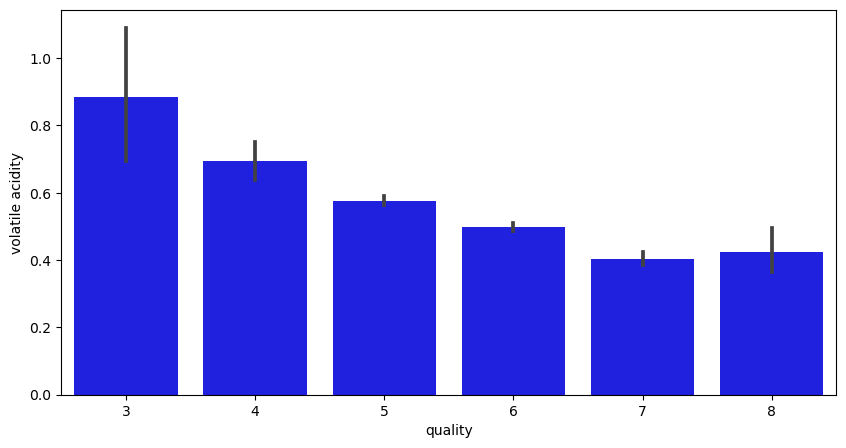

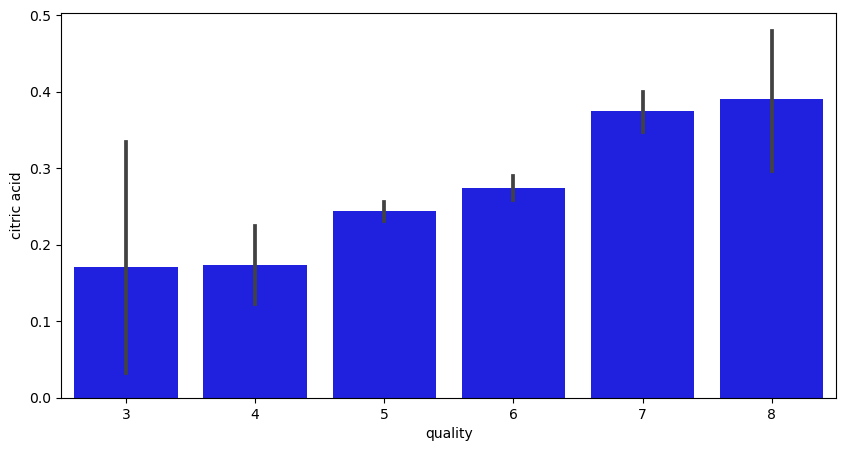

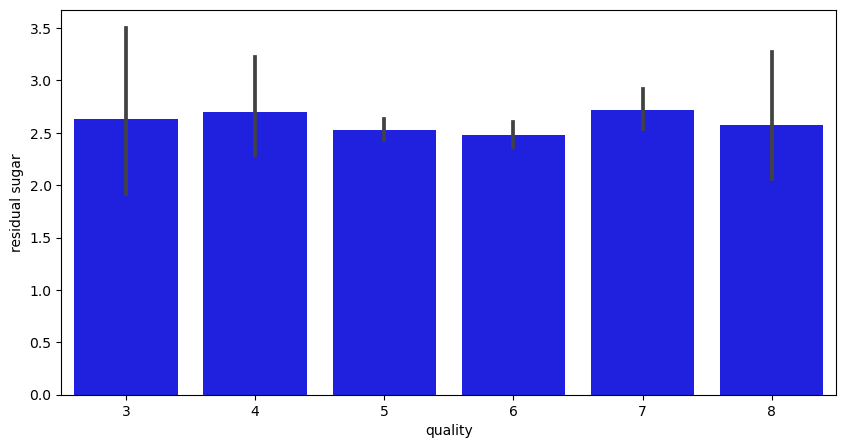

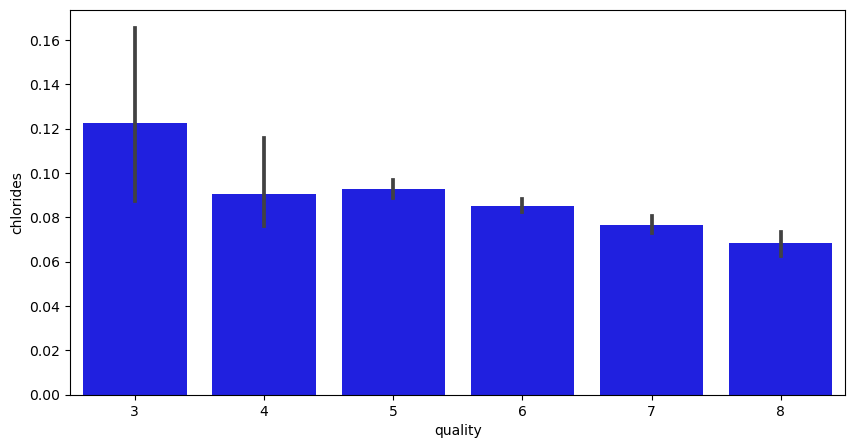

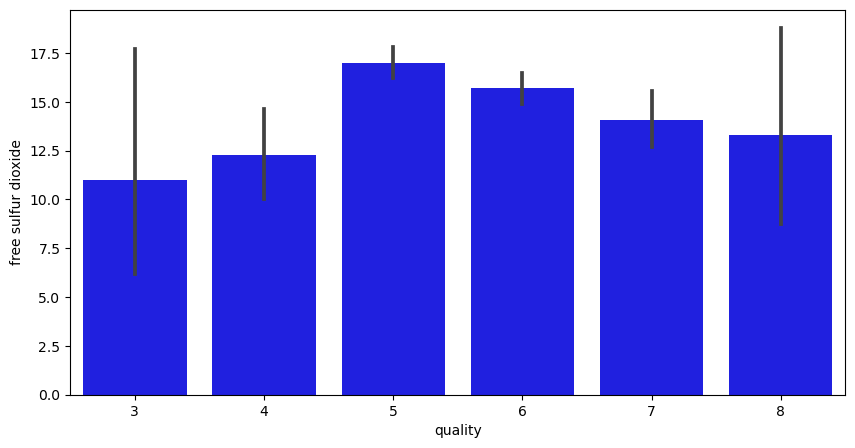

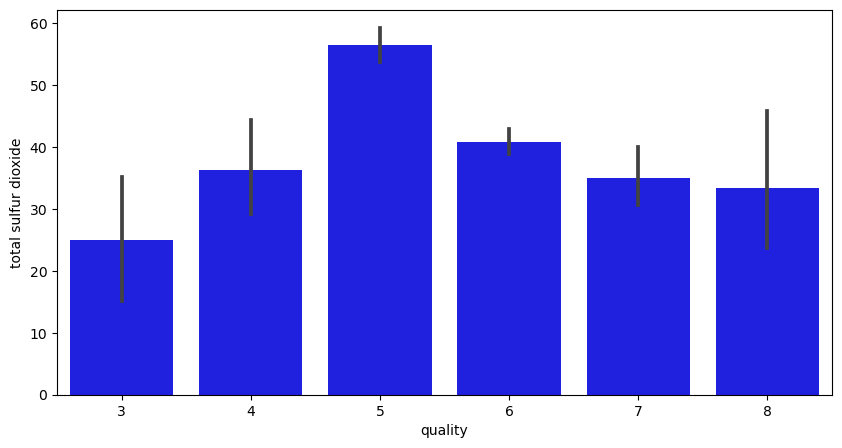

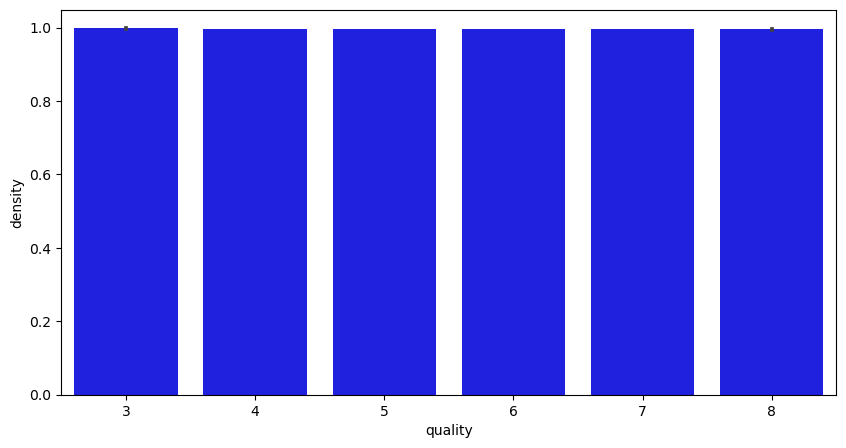

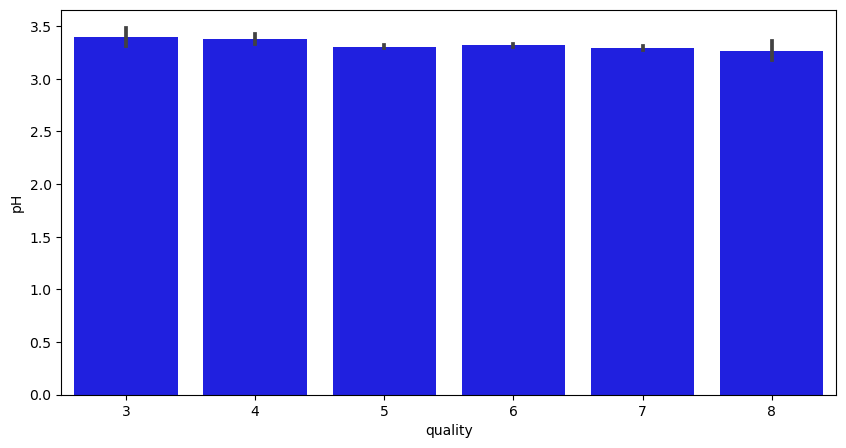

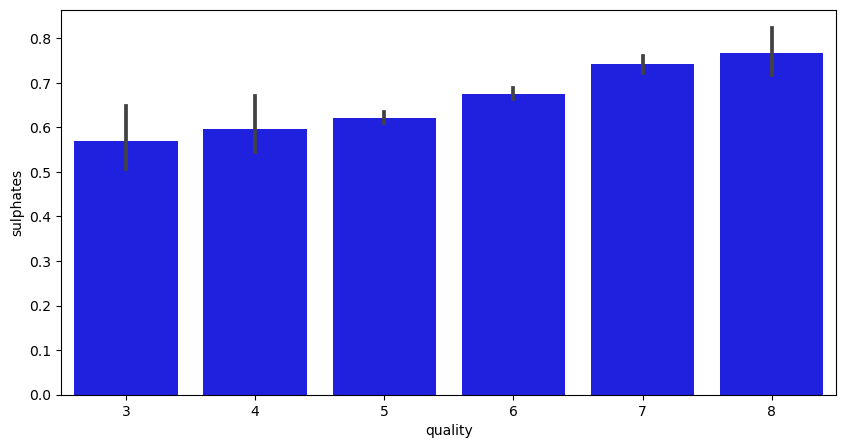

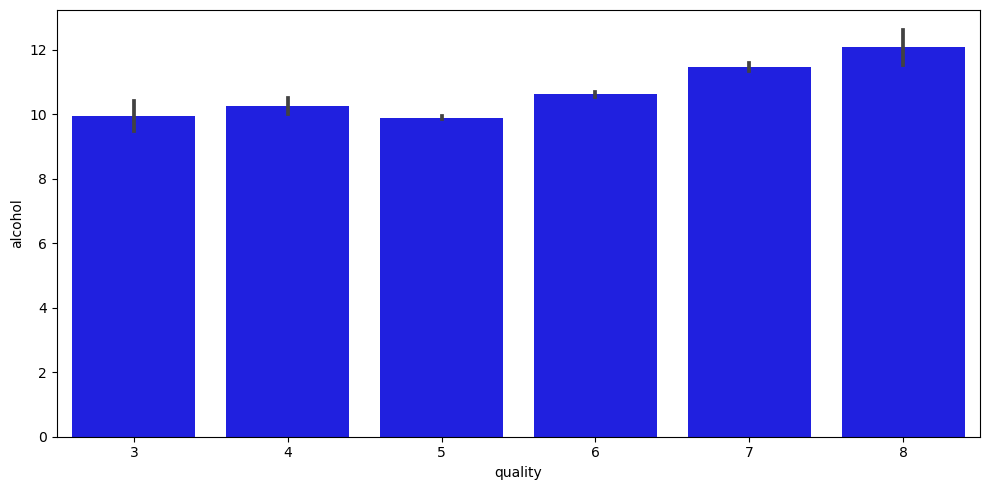

In [20]:
count=0 #Lets initialize a counter
df_target = df['quality'] #Setting Target variable
df_features = df.drop('quality', axis=1) #Identifying Features and seperating them from target variables

for i in df_features.items():
    plt.figure(figsize=(10,5))
    sns.barplot(x=df_target, y=i[count], data=df, color="blue")

plt.tight_layout()
plt.show()

From the Above BAR Plots between all the columns Vs the Target Variable "QUALITY", we can identify the trend related to the effect that each variable is having with respect to the Target Variable

Thus, We can conclude our observations corresponding to All the Feature Columns compared to the Our Target Variable(LABEL)such as:
   1) Fixed Acidity vs Quality - Can't Identify any fixed pattern 
   
   2) Volatile Acidity vs Quality - we can observe that, there is a decreasing trend pattern 
   
   3) Citric Acid vs Quality - observation gives an increasing trend between these two columns
   
   4) Residual Sugar vs Quality - We Can't Identify any fixed pattern
   
   5) Chlorides vs Quality - we can observe that, there is a decreasing trend pattern 
   
   6) Free Sulfur Dioxide vs Quality - There's No fixed pattern since it is First increasing and then it's decreasing 
   
   7) Total Sulfur Dioxide vs Quality - There's No fixed pattern since it is First increasing and then it's decreasing 
   
   8) Density vs Quality - no pattern at all 
   
   9) pH vs Quality - no pattern at all 
   
   10) Sulphates vs Quality - there is an increasing trend 11. alcohol vs quality - there is an increasing trend

From the above all observations. we can come to a conclusion that to get a better quality RED WINE, the columns citric acid, sulphates and alcohol plays major role.

### Let's Plot BOXPLOT for identifying Outliers

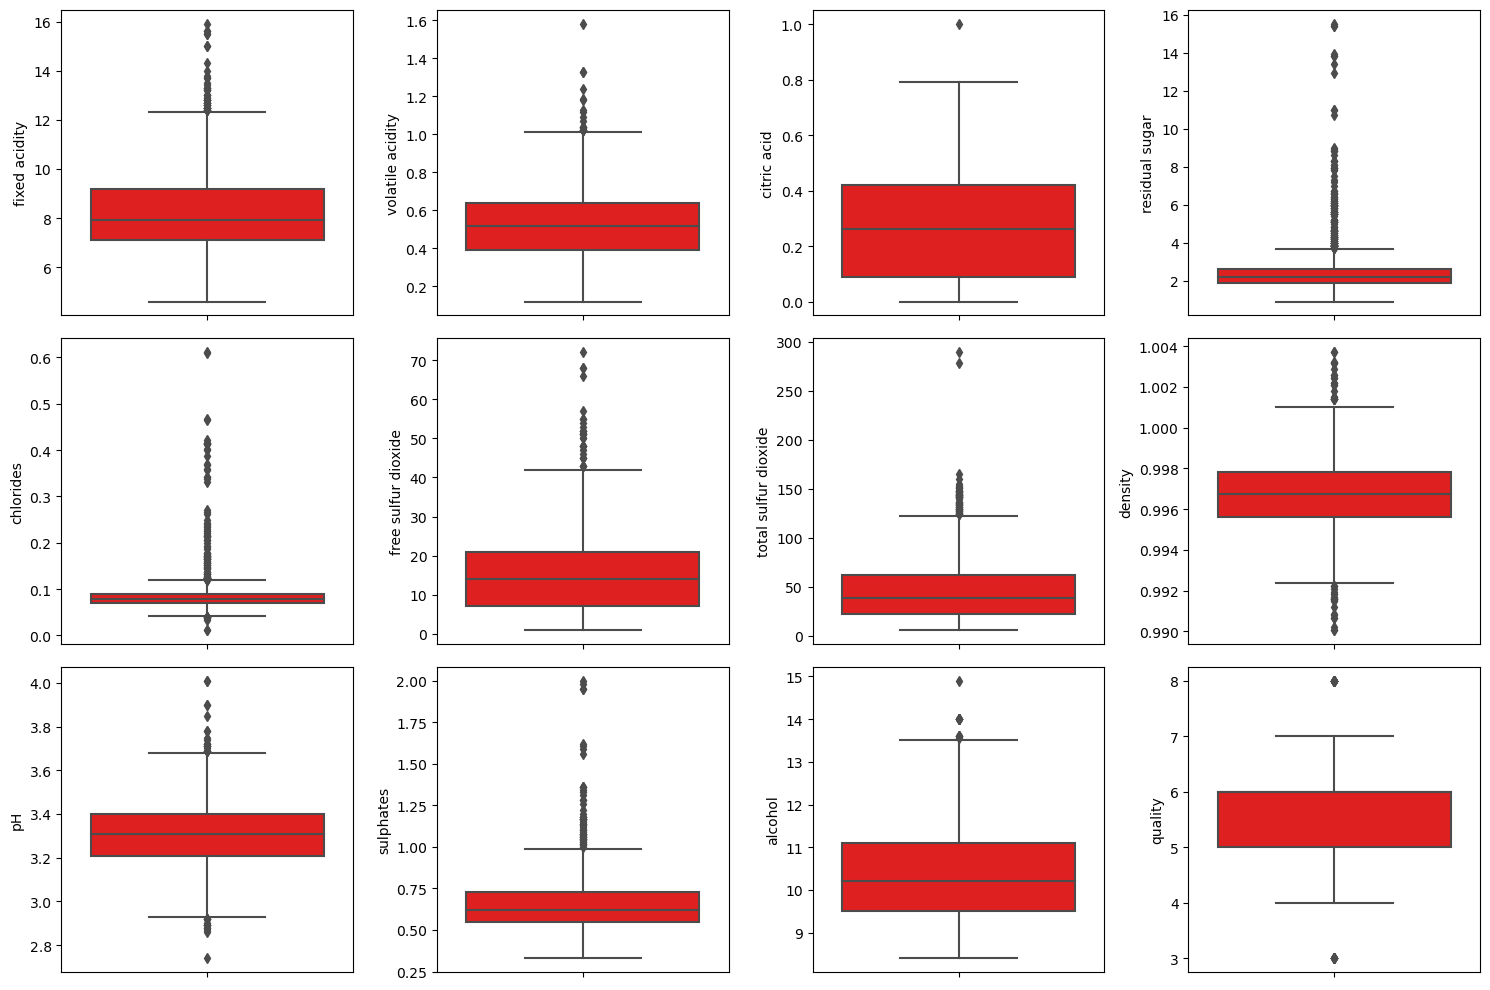

In [21]:
count = 1
plt.figure(figsize=(15,10))
for i, value in df.items():
    if count<=12:
        ax=plt.subplot(3, 4, count)
        sns.boxplot(y=i, data=df, color="r")
    count += 1
plt.tight_layout()
plt.show()

From the results of the above boxplot we conclude that the whisker details and outliers clearly. We can ignore the continous outlier sections since they're near to whiskers but the outliers that are far away from the whiskers of the boxplot can be considered for the removal depending upon further analysis from other graphs.From these Boxplots we can retain most of the information from the dataset by just considering the outliers far away from the whiskers

### Plotting Distplot

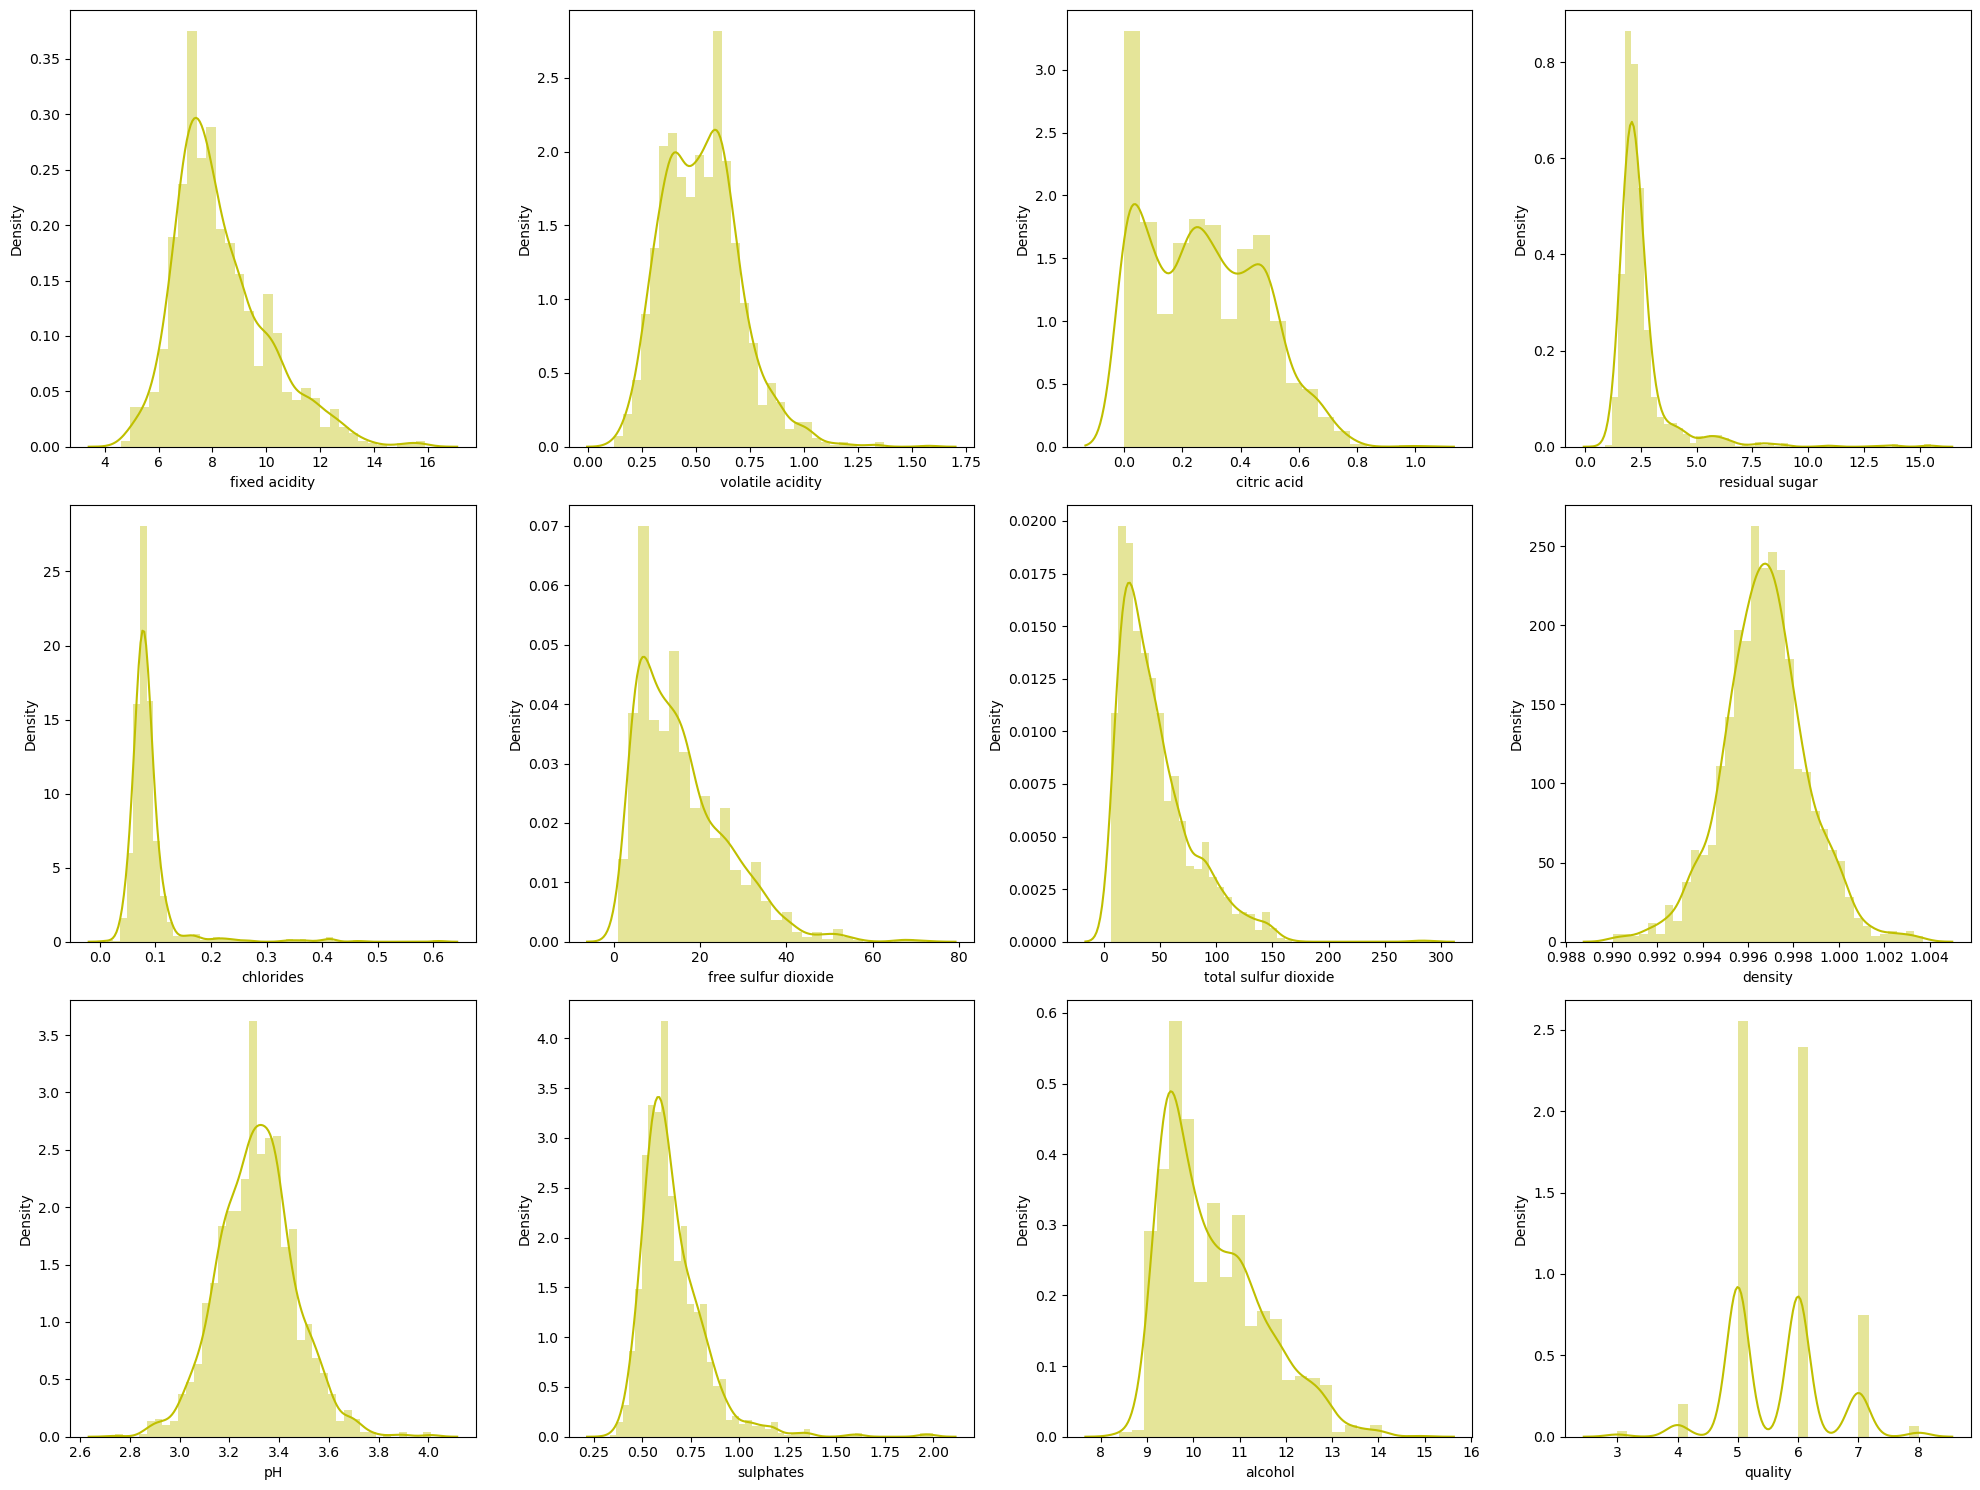

In [22]:
count = 1
plt.figure(figsize=(20,15))
for i, value in df.items():
    if count<=12:
        ax=plt.subplot(3, 4, count)
        sns.distplot(value, hist=True, color="y")
    count += 1
plt.tight_layout()
plt.show()

The distribution plots that we have plotted above shows that few of the columns are in normal distribution category showing a proper bell shape curve. 
But, we can observe the skewness in most of the feature columns such as citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates and alcohol columns. We are going to ignore the label column since it is a categorical column and will need to fix the imbalance data inside it.

With respect to the treatment of skewness and outliers we can perform the removal or treatment after We can see the accuracy dependency of the machine learning models.

### Let's plot Density Plot

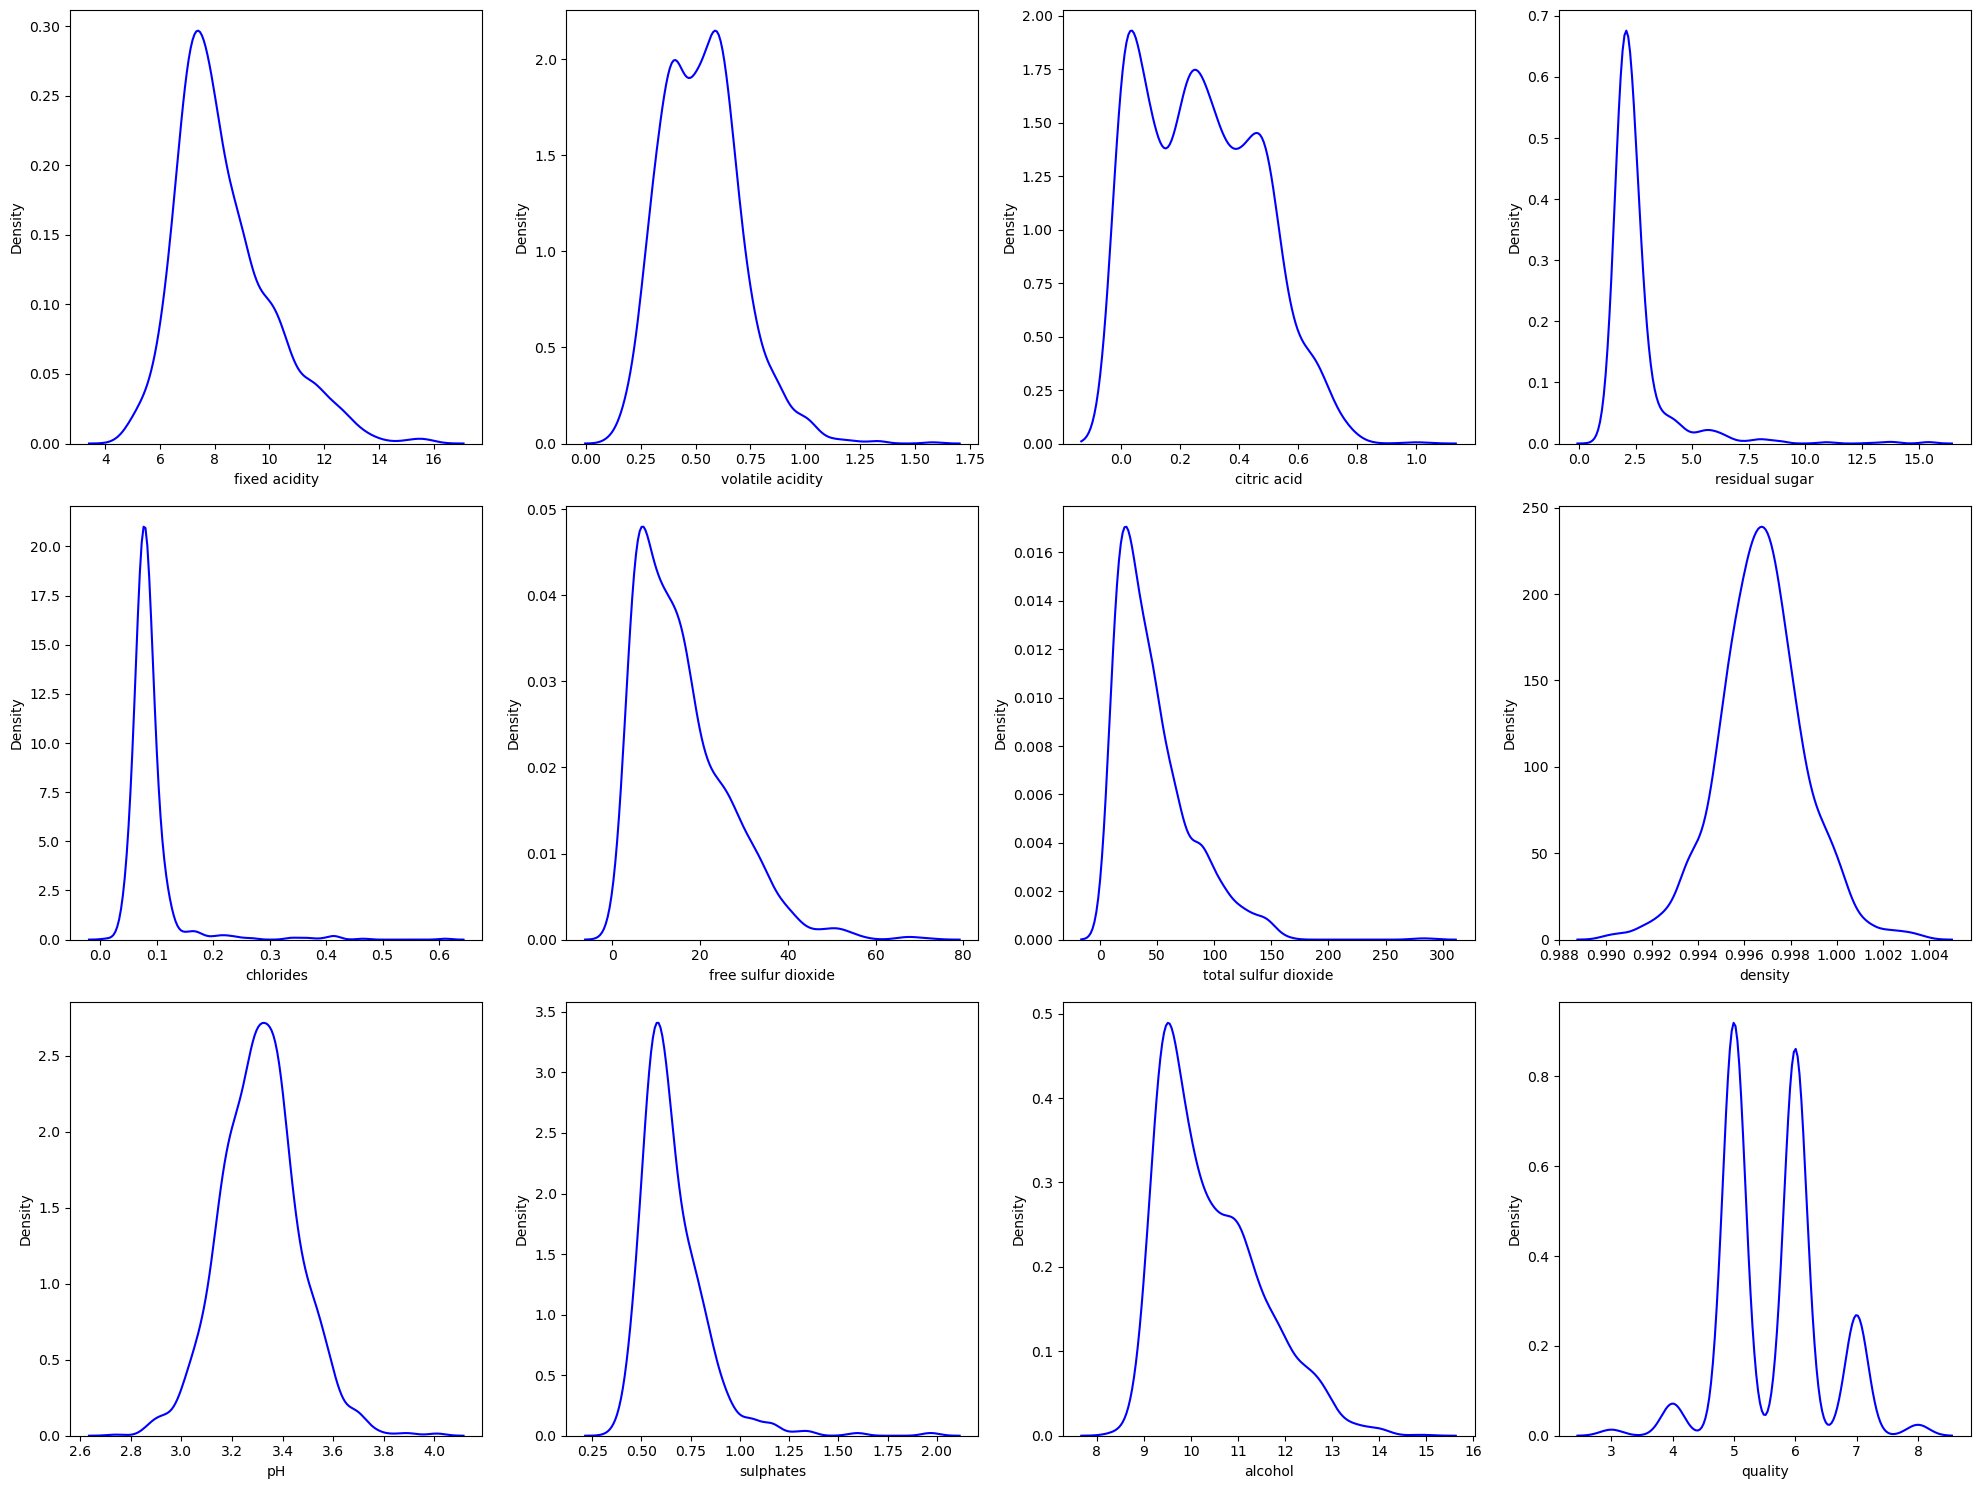

In [23]:
count = 1
plt.figure(figsize=(20,15))
for i, value in df.items():
    if count<=12:
        ax=plt.subplot(3, 4, count)
        sns.kdeplot(value, color="b")
    count += 1
plt.tight_layout()
plt.show()

These density plots are clearing giving the impression of skewness in almost all the columns. First let's check for removal of outliers and then later if it's required
we go for treatment of skewness problems based on the requirements

## Bivariant Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

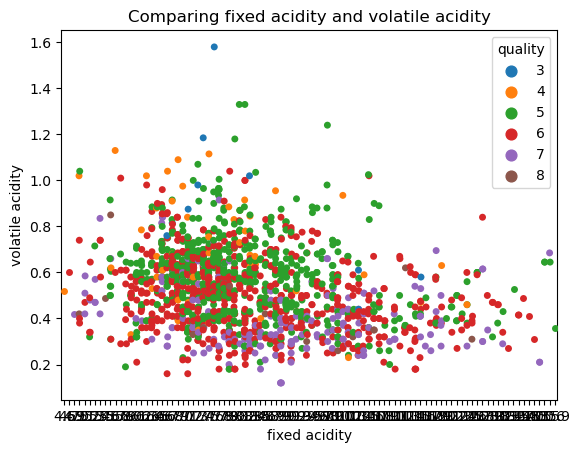

In [24]:
# Comparing fixed acidity and volatile acidity
plt.title("Comparing fixed acidity and volatile acidity")
sns.stripplot(x="fixed acidity", y="volatile acidity", data=df, hue='quality')
plt.show

The strip plot between Fixed acidity and Volatile acidity based on the quality of Wine is showing the variation for each unique value of quality.
with this we can understand how they're getting affected with respect to Quality.
Similarly we can plot and find out the reationship between every two variables in the same way.

<function matplotlib.pyplot.show(close=None, block=None)>

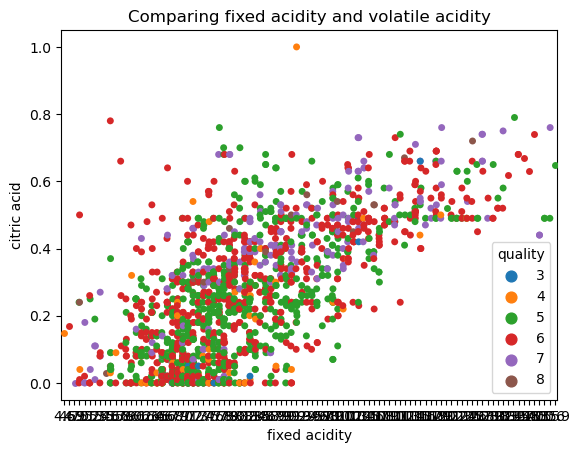

In [25]:
# Comparing fixed acidity and citric acid
plt.title("Comparing fixed acidity and volatile acidity")
sns.stripplot(x="fixed acidity", y="citric acid", data=df, hue='quality')
plt.show

## Multivariant Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

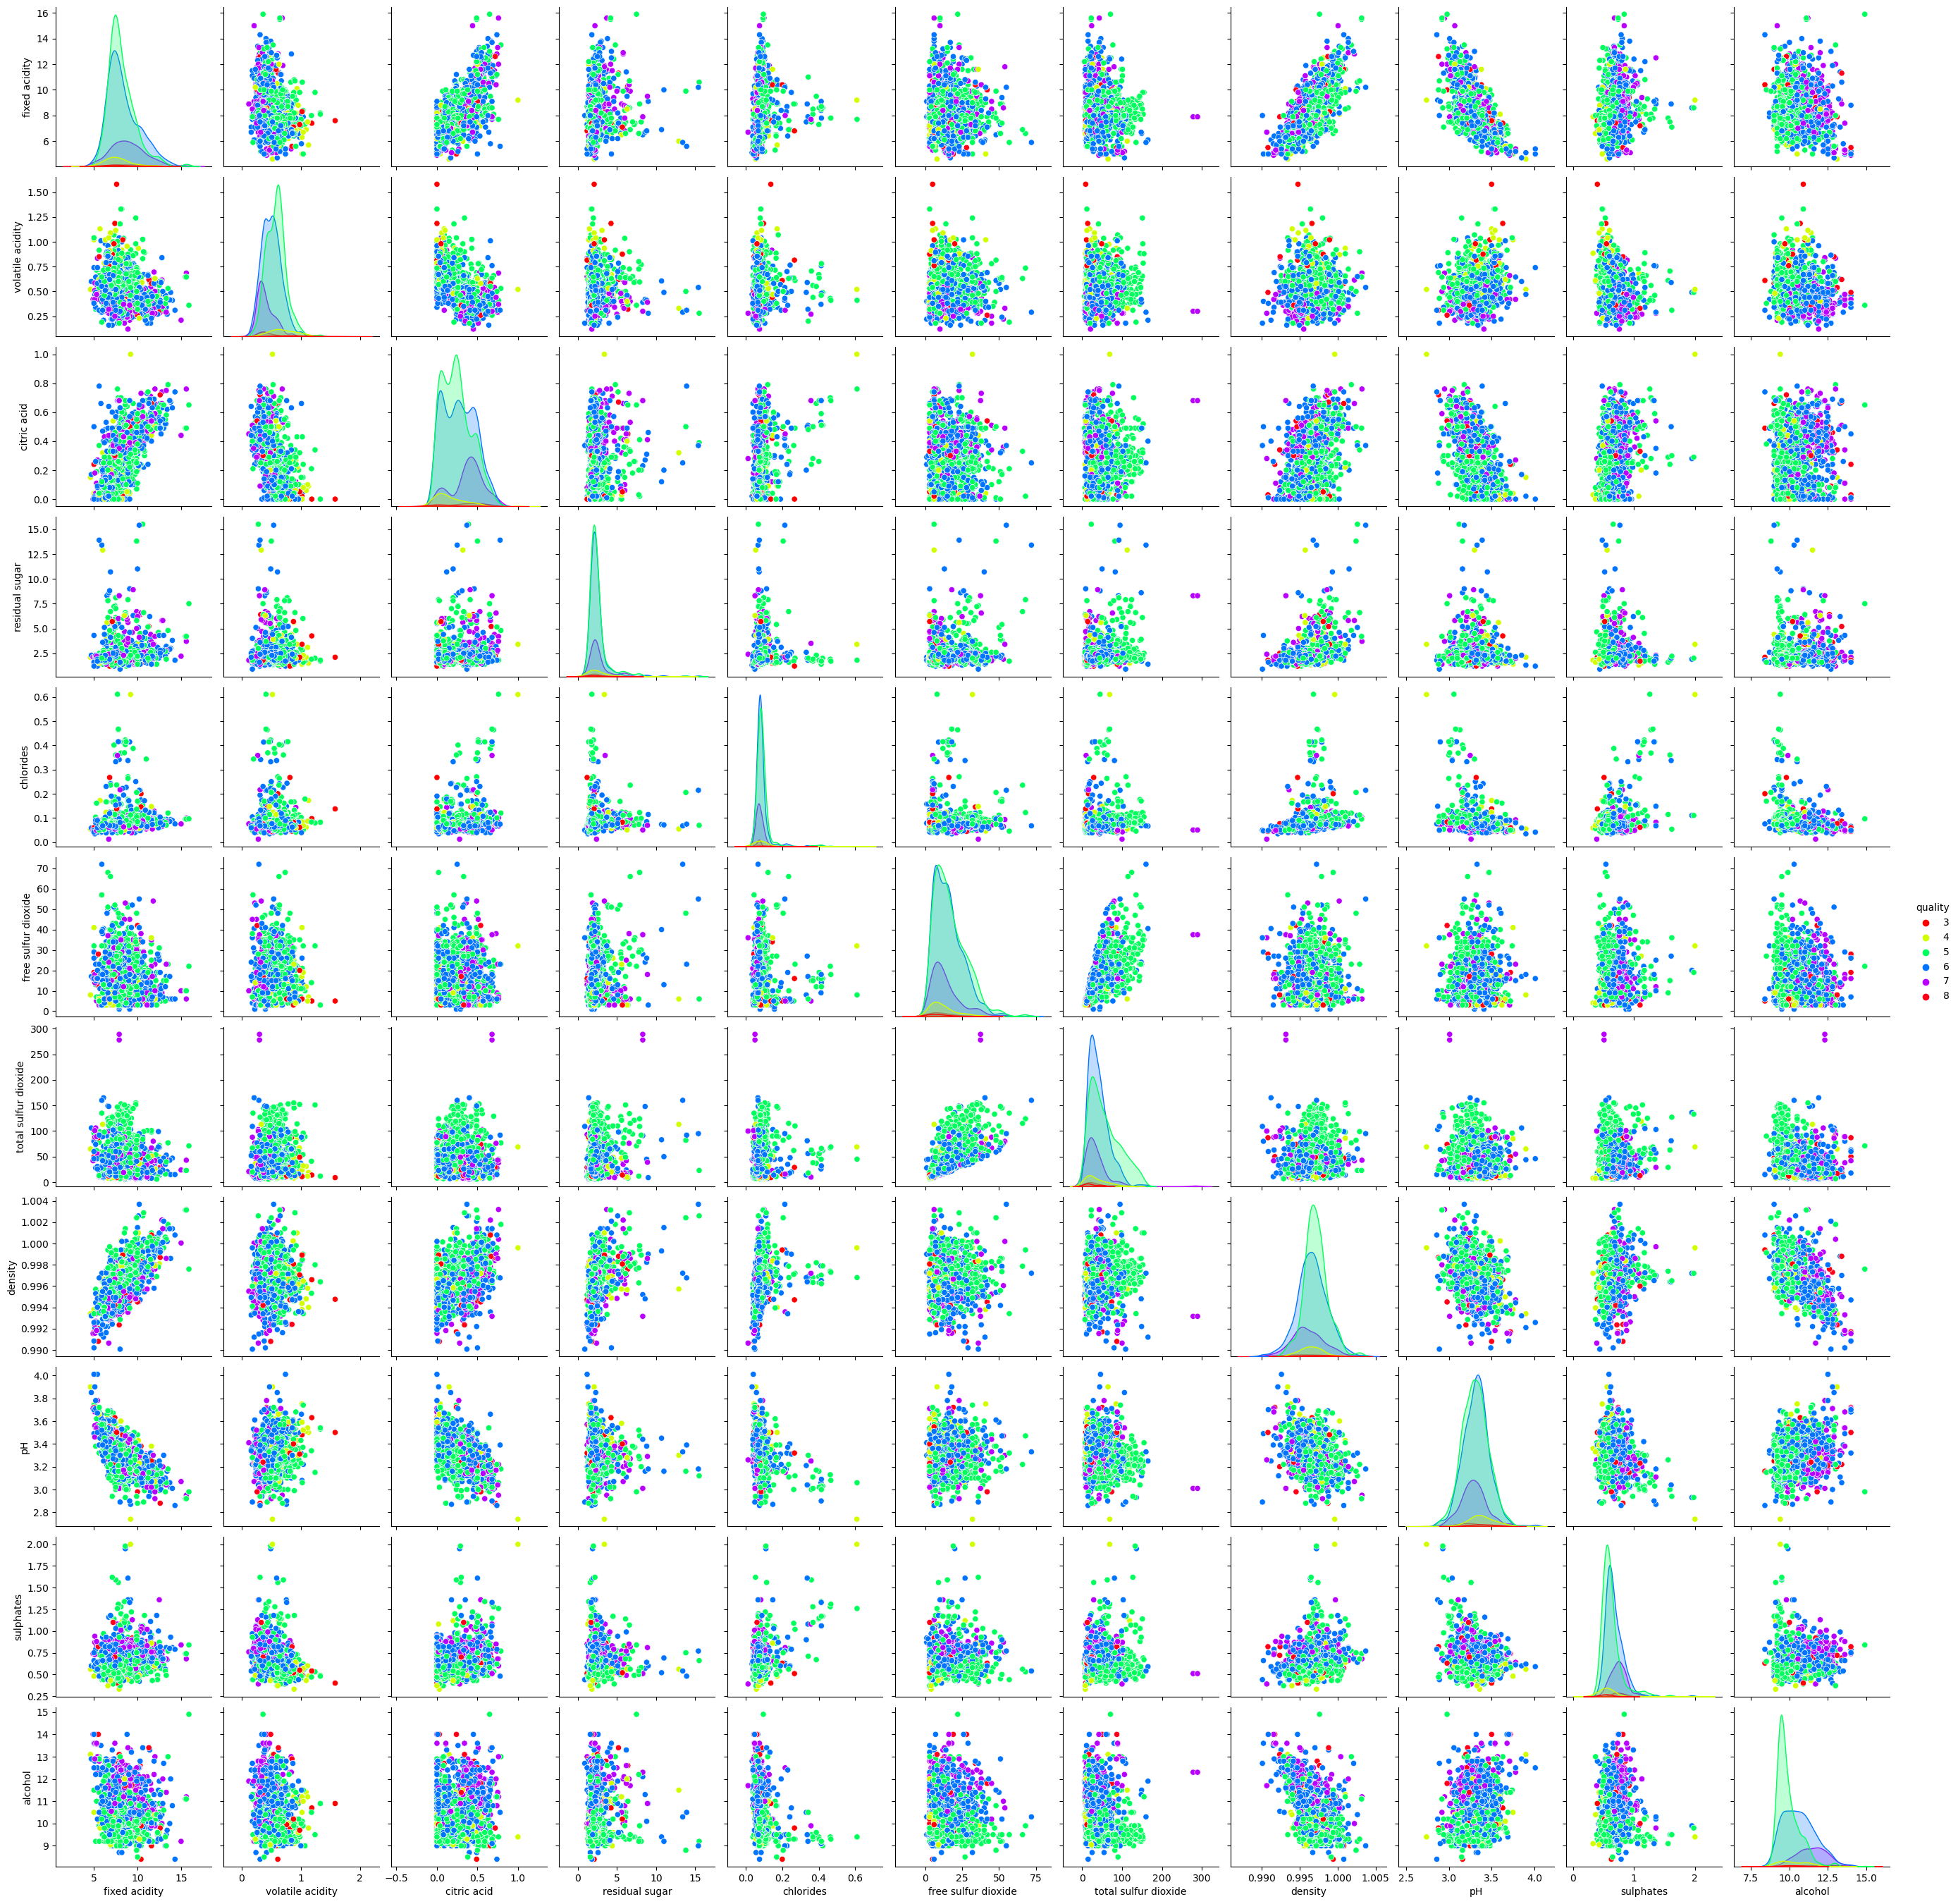

In [26]:
sns.pairplot(df, hue="quality", palette="hsv")
plt.show

## Checking the Correlation

In [27]:
# Checking the correlation between Features and Target Variables
cor=df.corr()
cor

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

This gives the correlation between Features and Label. we can visualize this by using HEATMAP

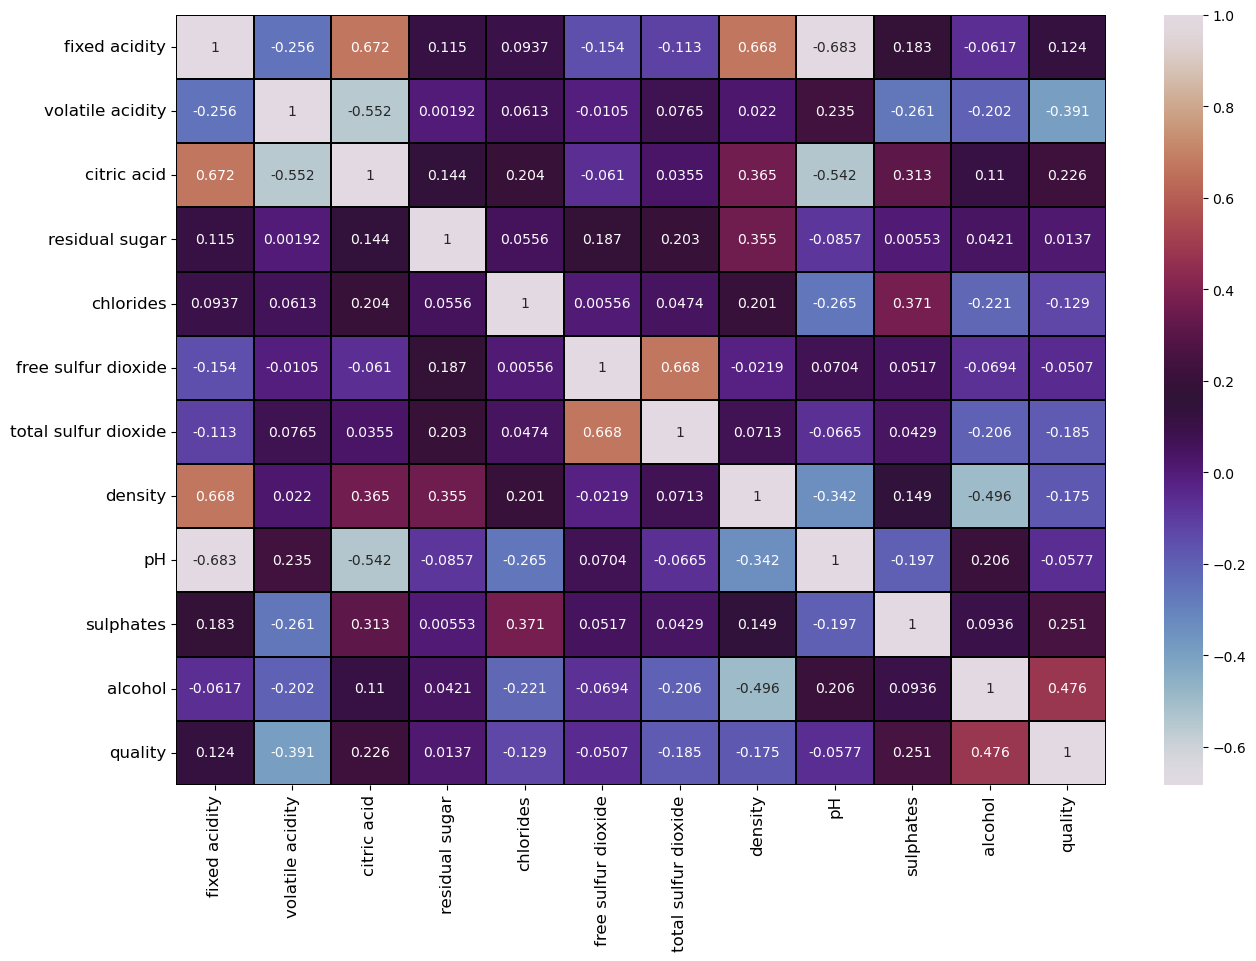

In [28]:
# Visualizing the Correlation Matrix by plotting Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), linewidths=0.1, fmt=".3g", linecolor= "black", annot= True, cmap="twilight")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

we can see that the above correlation values shows the correlation matrix data wherein there are positive as well as negative correlations between the target label and other feture columns. A zero correlation indicates that there is no relationship between the variables. Looking at the above representation we observe that the quality column is positively correlated with alcohol and it is negatively correlated with the volatile acidity. The quality column is least correlated with residual sugar showing a coefficient value of 0.014 that close to 0. Similarly we can bifurcate all the other positively and negatively correlated feature columns with respect to the target label.

Also there are some highly positive and negative correlated feature columns that can pose the concern for multicollinearity. If the correlation coefficient, assuming it to be the variable 'r', is exactly +1 or -1, then it is called perfect multicollinearity. But even if this 'r' is close to -1 or +1 then one of the features should be removed from the model if at all possible.

Right now we can observe that the columns fixed acidity and citirc acid are positively correlated with a value of 0.672 which is close to 1. Similary, columns fixed acidity and density are positively correlated with a value of 0.668 again being close to 1. The other 2 column that's positively correlated are free sulfur dioxide and total sulfur dioxide with a value of 0.668 which is close to the value 1. The only negatively correlated columns that pop up are fixed acitidy and pH with a value -0.683 being close to the value -1.

now we need to deal with multicollinearity later if required to improve the accuracy of our machine learning models.

In [29]:
cor['quality'].sort_values(ascending = False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

We can easily identify that, the target variable is positively correlated with alcohol, sulphates, citric acid, fixed acidity, residual sugar.
Negatively correlated with free sulfur dioxide, pH, chlorides, density, total sulfur dioxide and volatile acidity


## Visualizing the Correlation between Label and Features Using Bar Plot

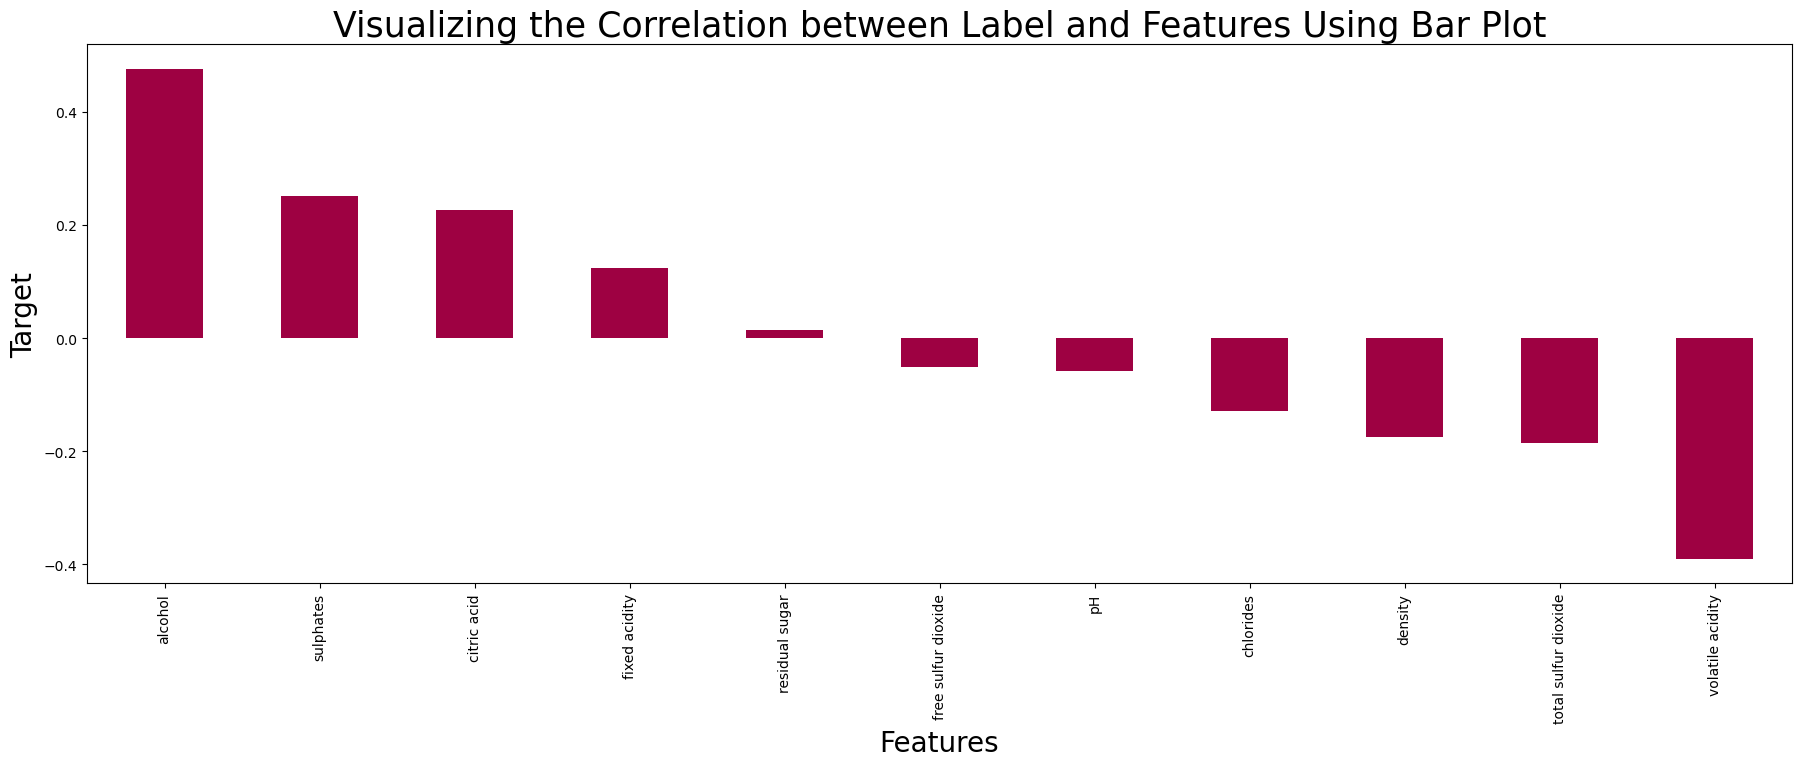

In [30]:
plt.figure(figsize=(22,7))
df.corr()['quality'].sort_values(ascending = False).drop(['quality']).plot(kind='bar', cmap="Spectral")
plt.xlabel('Features', fontsize = 20)
plt.ylabel('Target', fontsize = 20)
plt.title("Visualizing the Correlation between Label and Features Using Bar Plot", fontsize= 25)
plt.show()

From the above bar plot, we can observe the positive and negative correlations with target variable. Alcohol is having high positive correlation whereas Volatile acidity is having negative high correlation.
Residual sugar is having very less xorrelation among all.

### Check for Outliers using the box plots

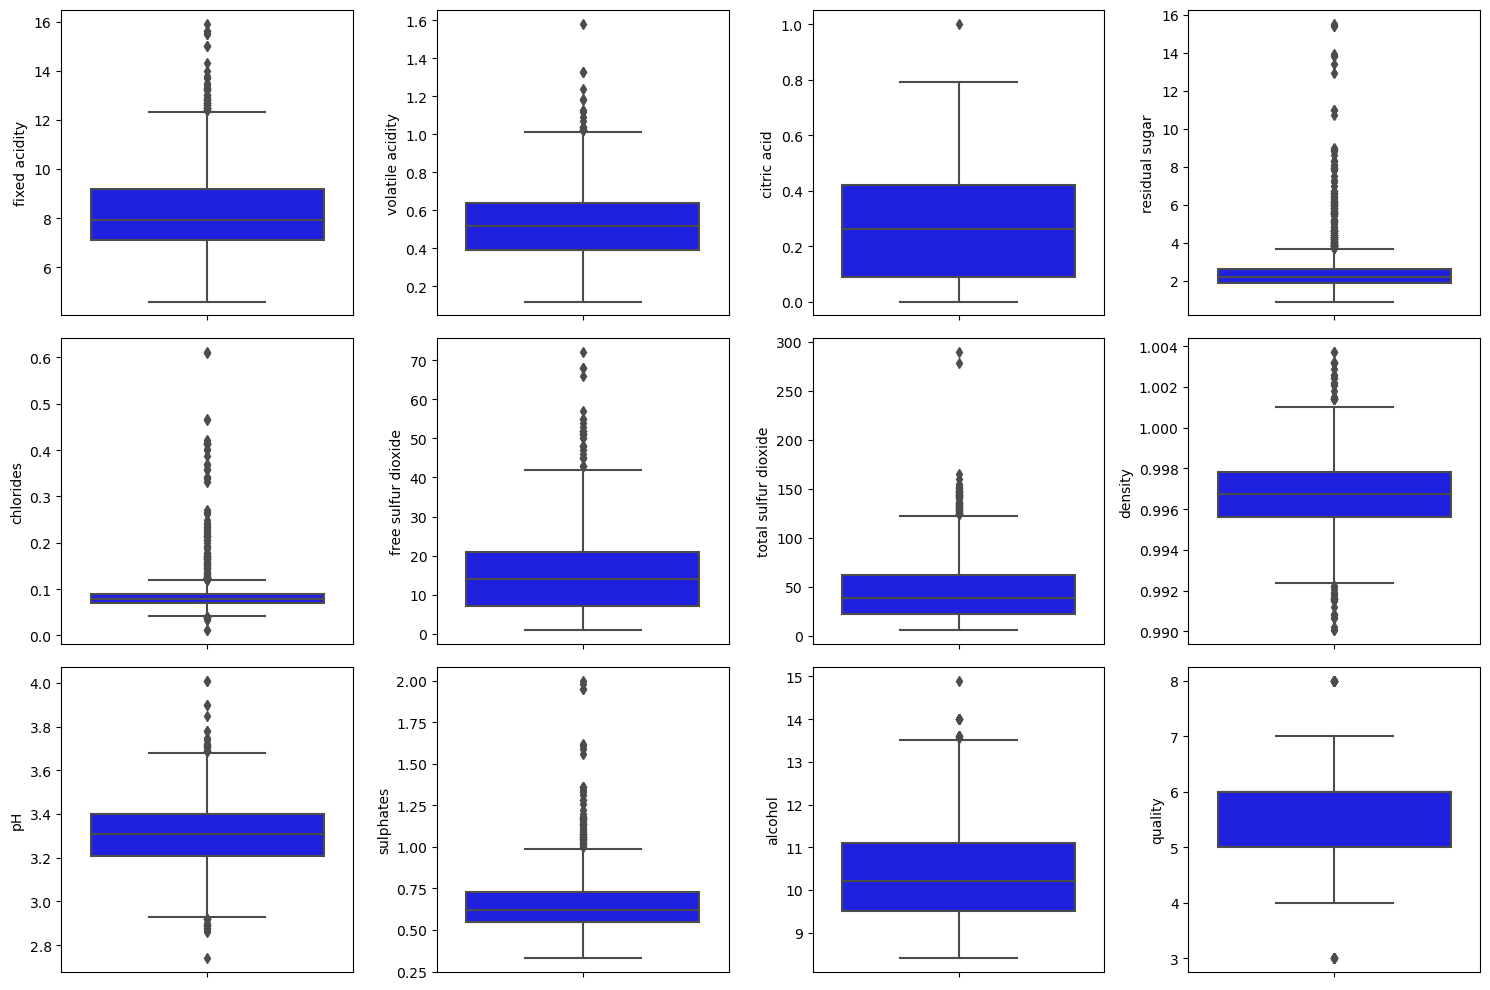

In [31]:
count = 1
plt.figure(figsize=(15,10))
for i, value in df.items():
    if count<=12:
        ax=plt.subplot(3, 4, count)
        sns.boxplot(y=i, data=df, color="b")
    count += 1
plt.tight_layout()
plt.show()

We can observe that the outliers are still present in the data set and let's go for removing them by using zscore method

In [32]:
#import zscore for the removal of outliers
import scipy.stats as stats
from scipy.stats import zscore

In [33]:
# Z score method

z=np.abs(zscore(df))
threshold=3
np.where(z>3)

df=df[(z<3).all(axis=1)]
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1451 rows x 12 columns]

#### Let's check the data loss after the removal of Outliers

In [34]:
# Percentage of Data Loss

data_loss=(1599-1451)/1599*100 
# 1599 (number of rows in the original dataframe) and 1485 (number of rows after outlier removal)
data_loss

9.255784865540964

After removing the outliers we can see the data loss percentage and it's less than 10%, which is acceptable range for proceeding for checking for multicollinearity again

## Removing Skewness

In [35]:
df.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
dtype: float64

Now when we observe the skew results, in the features columns, we can conclude that fixed acidity, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates and alcohol are all outside the acceptable range.
These values of skewness indicates that the outliers are present in our dataset and we need to be remove them if required.

In [36]:
# Removing Skewness using Cuberoot Method in all the columns having skewness since all are numerical data
df['fixed acidity']=np.cbrt(df['fixed acidity'])
df['residual sugar']=np.cbrt(df['residual sugar'])
df['chlorides']=np.cbrt(df['chlorides'])
df['free sulfur dioxide']=np.cbrt(df['free sulfur dioxide'])
df['total sulfur dioxide']=np.cbrt(df['total sulfur dioxide'])
df['sulphates']=np.cbrt(df['sulphates'])
df['alcohol']=np.cbrt(df['alcohol'])

In [37]:
#Lets check skewness again
df.skew()

fixed acidity           0.529105
volatile acidity        0.380659
citric acid             0.291297
residual sugar          1.629524
chlorides               1.020246
free sulfur dioxide     0.125799
total sulfur dioxide    0.342621
density                 0.055738
pH                      0.114705
sulphates               0.523901
alcohol                 0.646678
quality                 0.407865
dtype: float64

Even after applying cuberoot method the skewness is not reduced into acceptable range. Lets apply log transform method and check it again

In [38]:
# Removing Skewness using Log Trannsform Method in fixed acidity
df['residual sugar']=np.log(df['residual sugar'])
df['chlorides']=np.log(df['chlorides'])
df['alcohol']=np.log(df['alcohol'])

In [39]:
#Lets check skewness again
df.skew()

fixed acidity           0.529105
volatile acidity        0.380659
citric acid             0.291297
residual sugar          1.227096
chlorides               0.496272
free sulfur dioxide     0.125799
total sulfur dioxide    0.342621
density                 0.055738
pH                      0.114705
sulphates               0.523901
alcohol                 0.592414
quality                 0.407865
dtype: float64

even after applying Cuberoot and Log transformation methods to reduce skewness, still residual sugaris outside the range of acceptable range of skewness

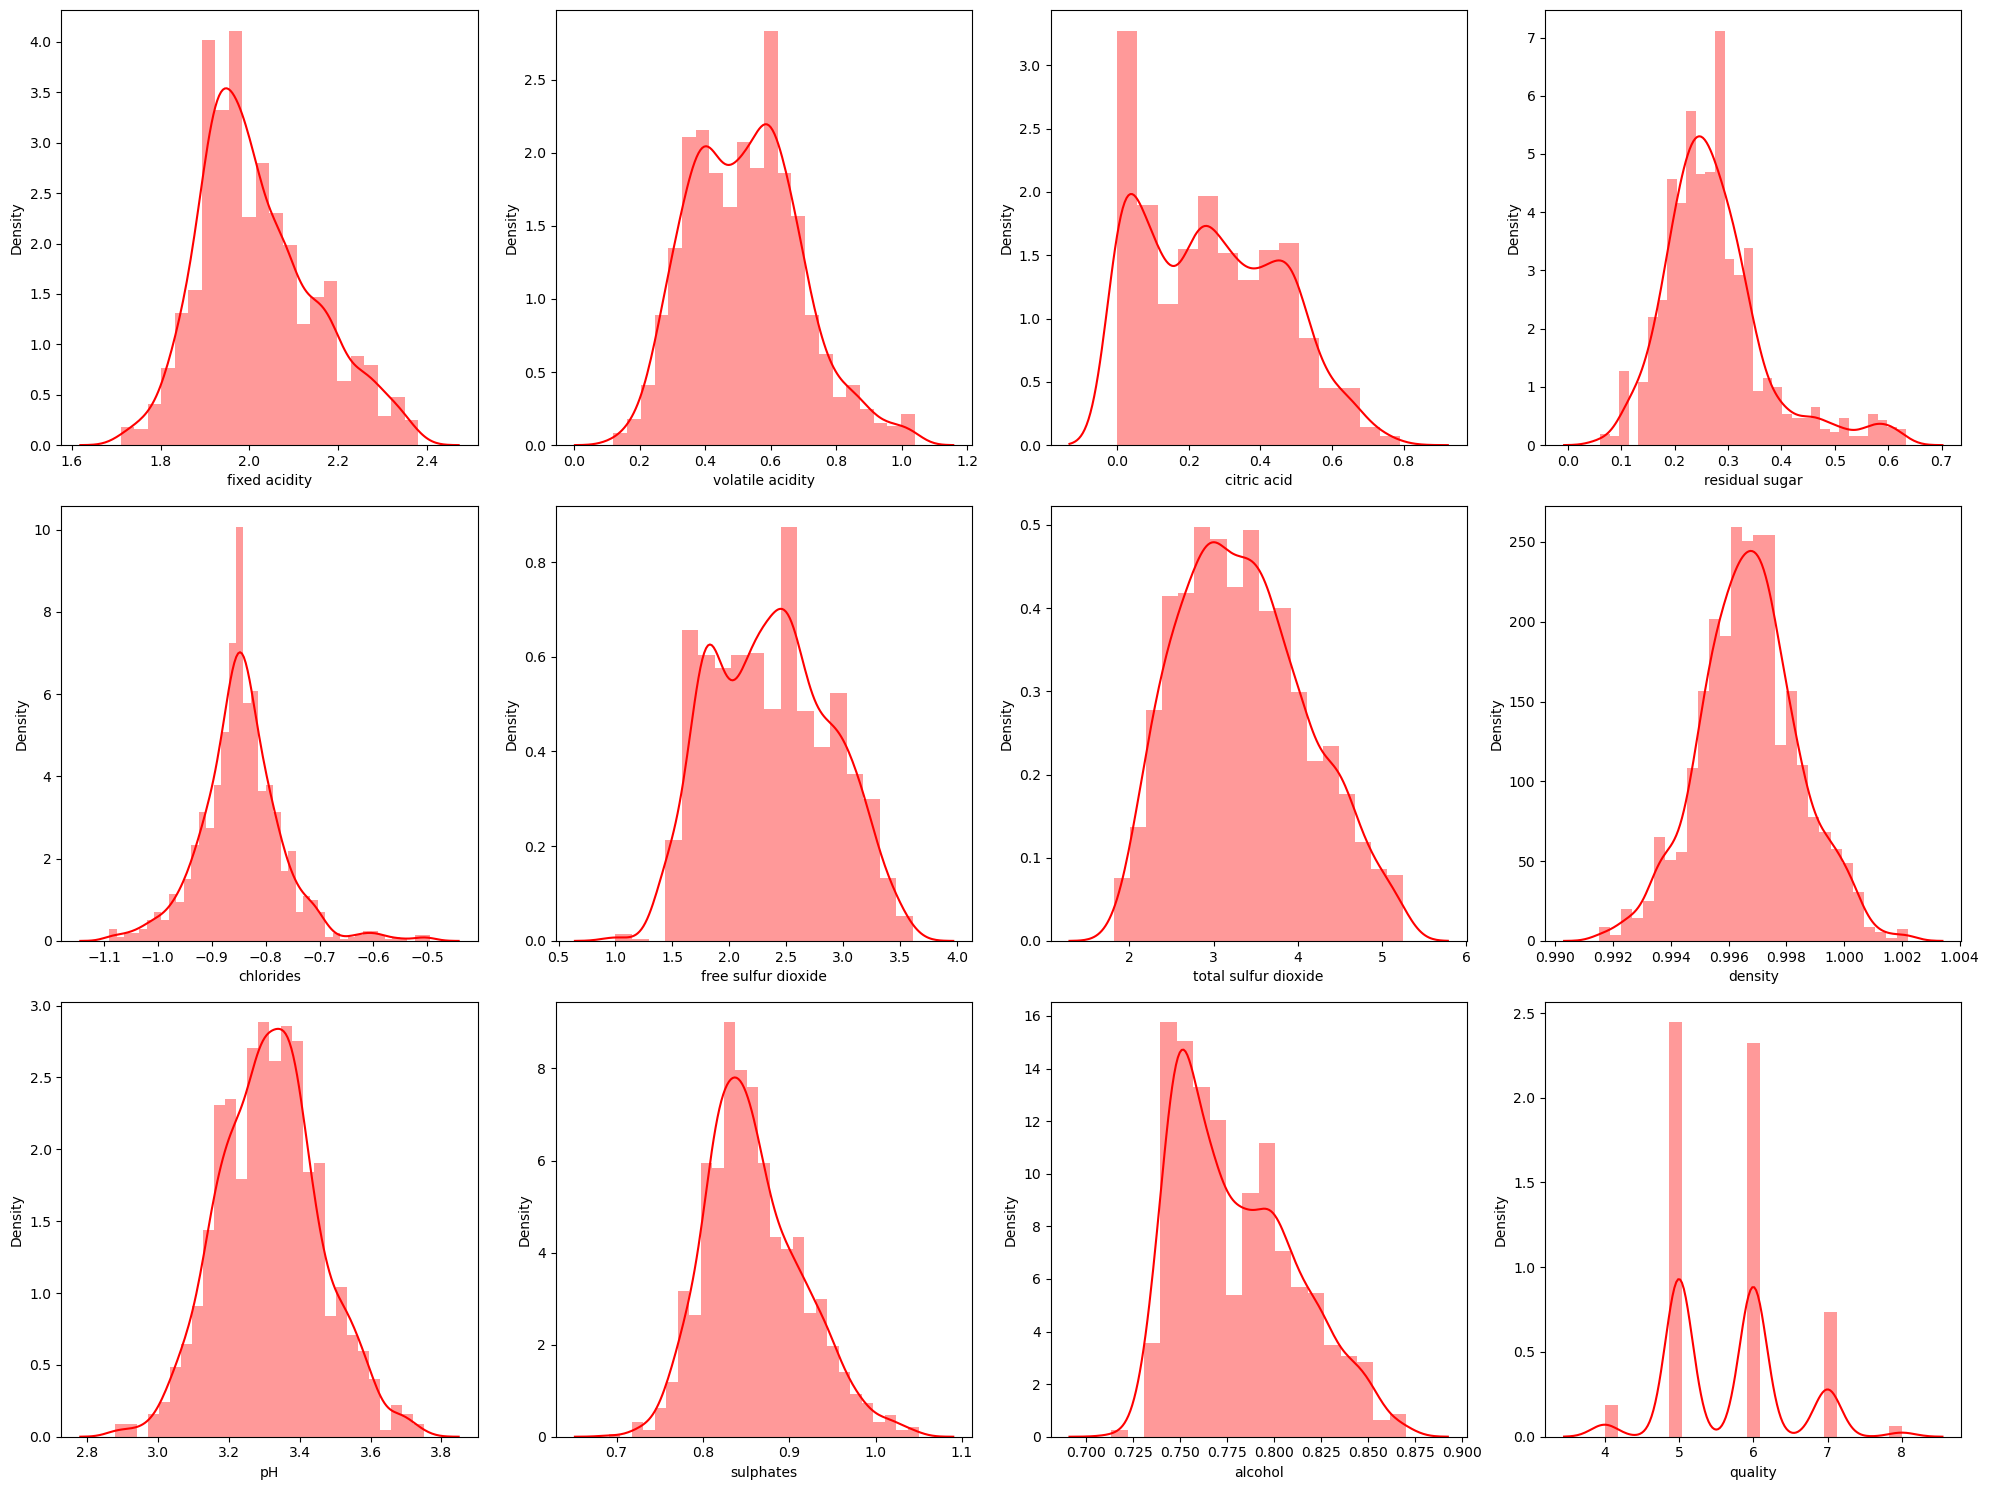

In [40]:
### Lets check the skewness again by distribution plots
count = 1
plt.figure(figsize=(20,15))
for i, value in df.items():
    if count<=12:
        ax=plt.subplot(3, 4, count)
        sns.distplot(value, color="r")
    count += 1
plt.tight_layout()
plt.show()

Except Quality we can accept the skewness for all other features since they're near to normal distribution 

## Checking FOr Multicollinearity

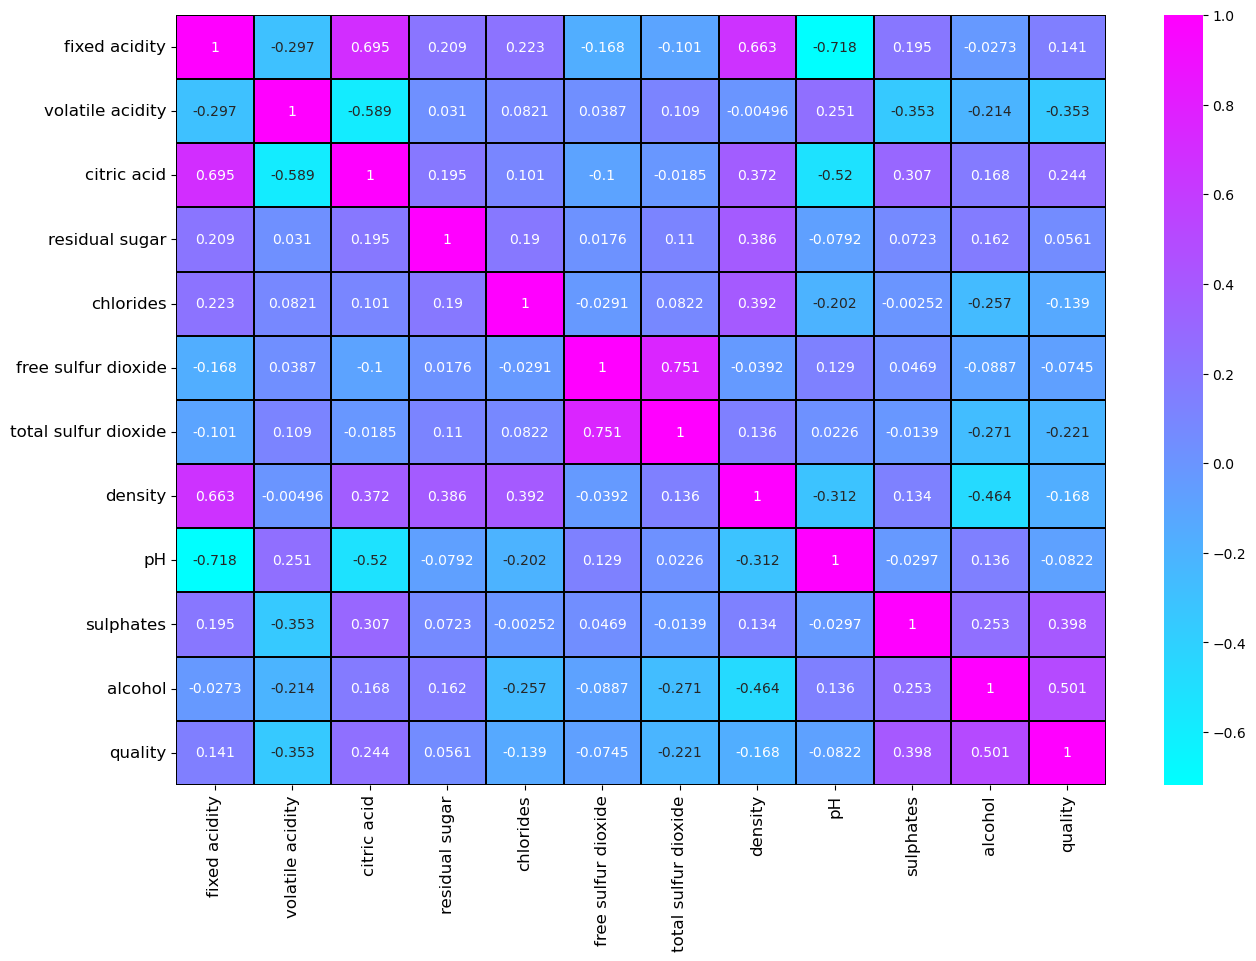

In [41]:
# Visualizing the Correlation Matrix by plotting Heatmap again
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), linewidths=0.1, fmt=".3g", linecolor= "black", annot= True, cmap="cool")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Dropping a Column to handle Multicollinearity

In [42]:
df = df.drop('free sulfur dioxide', axis=1)
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          1.948695             0.700         0.00        0.213951  -0.859007   
1          1.983192             0.880         0.00        0.318504  -0.774263   
2          1.983192             0.760         0.04        0.277636  -0.795322   
3          2.237378             0.280         0.56        0.213951  -0.863422   
4          1.948695             0.700         0.00        0.213951  -0.859007   
...             ...               ...          ...             ...        ...   
1594       1.837091             0.600         0.08        0.231049  -0.802649   
1595       1.806969             0.550         0.10        0.262819  -0.926874   
1596       1.846915             0.510         0.13        0.277636  -0.859007   
1597       1.806969             0.645         0.12        0.231049  -0.863422   
1598       1.817121             0.310         0.47        0.426978  -0.901021   

      total sulfur dioxide  density    pH  sulphates   alcohol  quality  
0                 3.239612  0.99780  3.51   0.824257  0.746903        5  
1                 4.061548  0.99680  3.20   0.879366  0.760794        5  
2                 3.779763  0.99700  3.26   0.866239  0.760794        5  
3                 3.914868  0.99800  3.16   0.833955  0.760794        6  
4                 3.239612  0.99780  3.51   0.824257  0.746903        5  
...                    ...      ...   ...        ...       ...      ...  
1594              3.530348  0.99490  3.45   0.833955  0.783792        5  
1595              3.708430  0.99512  3.52   0.912581  0.805305        6  
1596              3.419952  0.99574  3.42   0.908560  0.799298        6  
1597              3.530348  0.99547  3.57   0.892112  0.774129        5  
1598              3.476027  0.99549  3.39   0.870659  0.799298        6  

[1451 rows x 11 columns]

Since, free sulfur dioxide and total sulfur dioxide are both having high correlation and towards the same feature of sulfur dioxide therefore I am dropping the free option and keeping just the total option in our dataset.

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [43]:
X = df.drop('quality', axis=1)
Y = df['quality']

The data has been bifurcated into features and labels where X represents all the feature columns and Y represents the target label column.

### Let's check for the Class Imbalance

In [44]:
Y.value_counts()

5    617
6    586
7    185
4     47
8     16
Name: quality, dtype: int64

Listing the values of our label column to count the number of rows occupied by each category. This indicates class imbalance that we will need to fix by using the oversampling method.

In [45]:
#Import SMOTE from imblearn 
from imblearn.over_sampling import SMOTE

In [46]:
# adding samples to make all the categorical quality values same

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

SMOTE is the over sampling mechanism that we are using to ensure that all the categories present in our target label have the same value.

In [47]:
#lets check the class imbalance is handled or not
Y.value_counts()

5    617
6    617
7    617
4    617
8    617
Name: quality, dtype: int64

After applying over sampling, once again let us list the values of our target variable column to crosscheck the updated information. From the above result we can see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the machine learning model does not get biased towards one category.

In [48]:
Y # Displaying just the label

0       5
1       5
2       5
3       6
4       5
       ..
3080    8
3081    8
3082    8
3083    8
3084    8
Name: quality, Length: 3085, dtype: int64

# Feature Selection and Label Binarization

In [49]:
Y = Y.apply(lambda y_value:1 if y_value>=7 else 0) # 1 is for good quality and 0 for bad (not good) quality
Y # Displaying the label after applying label binarization

0       0
1       0
2       0
3       0
4       0
       ..
3080    1
3081    1
3082    1
3083    1
3084    1
Name: quality, Length: 3085, dtype: int64

As per the given instruction I Used the label binarization technique and  we have assigned the unique values present in our target label to 2 major class that are 0 for Not a good quality wine and 1 for good quality wine.

In [50]:
# Let's Display all the features except the label
X 

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          1.948695          0.700000     0.000000        0.213951  -0.859007   
1          1.983192          0.880000     0.000000        0.318504  -0.774263   
2          1.983192          0.760000     0.040000        0.277636  -0.795322   
3          2.237378          0.280000     0.560000        0.213951  -0.863422   
4          1.948695          0.700000     0.000000        0.213951  -0.859007   
...             ...               ...          ...             ...        ...   
3080       2.086816          0.354581     0.424638        0.262353  -0.877935   
3081       2.151704          0.322148     0.546711        0.332264  -0.861626   
3082       2.093692          0.397439     0.501537        0.202208  -0.881934   
3083       2.212179          0.543720     0.643779        0.500365  -0.823549   
3084       2.203575          0.350000     0.530000        0.318504  -0.886420   

      total sulfur dioxide   density        pH  sulphates   alcohol  
0                 3.239612  0.997800  3.510000   0.824257  0.746903  
1                 4.061548  0.996800  3.200000   0.879366  0.760794  
2                 3.779763  0.997000  3.260000   0.866239  0.760794  
3                 3.914868  0.998000  3.160000   0.833955  0.760794  
4                 3.239612  0.997800  3.510000   0.824257  0.746903  
...                    ...       ...       ...        ...       ...  
3080              2.686890  0.995821  3.191229   0.876164  0.804753  
3081              2.548496  0.996754  3.150000   0.925479  0.810754  
3082              2.519842  0.994752  3.206926   0.882763  0.839727  
3083              2.645251  0.998228  3.203314   0.904855  0.854305  
3084              2.519842  0.997200  3.150000   0.866239  0.799298  

[3085 rows x 10 columns]

In [51]:
# Lets Import all the libraries for scaling, Building Machine Learning Models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

### Feature Scaling Using Standard Scaling

In [52]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X # Displaying all the features after applying scaling technique to avoid bias output

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.629992          1.016838    -1.457932       -0.690610  -0.024072   
1         -0.357715          2.019414    -1.457932        0.392536   1.209078   
2         -0.357715          1.351030    -1.256468       -0.030844   0.902632   
3          1.648500         -1.322508     1.362560       -0.690610  -0.088317   
4         -0.629992          1.016838    -1.457932       -0.690610  -0.024072   
...             ...               ...          ...             ...        ...   
3080       0.460156         -0.907102     0.680796       -0.189179  -0.299489   
3081       0.972299         -1.087747     1.295628        0.535089  -0.062180   
3082       0.514430         -0.668390     1.068104       -0.812269  -0.357687   
3083       1.449613          0.146379     1.784519        2.276588   0.491892   
3084       1.381707         -0.932617     1.211462        0.392536  -0.422964   

      total sulfur dioxide   density        pH  sulphates   alcohol  
0                 0.126156  0.828337  1.472985  -0.749308 -1.309292  
1                 1.254255  0.228322 -0.756320   0.210065 -0.896816  
2                 0.867508  0.348325 -0.324842  -0.018456 -0.896816  
3                 1.052938  0.948341 -1.043973  -0.580478 -0.896816  
4                 0.126156  0.828337  1.472985  -0.749308 -1.309292  
...                    ...       ...       ...        ...       ...  
3080             -0.632449 -0.359014 -0.819398   0.154318  0.408484  
3081             -0.822394  0.200946 -1.115886   1.012841  0.586678  
3082             -0.861721 -1.000410 -0.706510   0.269211  1.447007  
3083             -0.689599  1.085085 -0.732490   0.653796  1.879898  
3084             -0.861721  0.468328 -1.115886  -0.018456  0.246530  

[3085 rows x 10 columns]

We used Fit Transform method for scaling the data by Standrd Scalrization process and made the features ready for building. With this all the features have been standrdized

# Creating the training and testing data sets

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=7)

# Machine Learning Models for Classification Problem and Evaluation Metrics

In [54]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In the above classification, we have defined a function that will perform the train-test split, training of machine learning model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score and the result of difference between the accuracy score and cross validation score for any machine learning model that calls for this function.

In [55]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 88.0064829821718

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90       375
           1       0.84      0.86      0.85       242

    accuracy                           0.88       617
   macro avg       0.87      0.88      0.87       617
weighted avg       0.88      0.88      0.88       617

Cross Validation Score: 87.48784440842789

Accuracy Score - Cross Validation Score is 0.5186385737439139


Created the Logistic Regression Model and checked for it's evaluation metrics.

In [56]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Accuracy Score: 91.57212317666126

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93       375
           1       0.90      0.88      0.89       242

    accuracy                           0.92       617
   macro avg       0.91      0.91      0.91       617
weighted avg       0.92      0.92      0.92       617

Cross Validation Score: 89.43273905996759

Accuracy Score - Cross Validation Score is 2.1393841166936767


Created the Support Vector Classifier Model and checked for it's evaluation metrics.

In [57]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Accuracy Score: 92.22042139384116

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93       375
           1       0.87      0.94      0.90       242

    accuracy                           0.92       617
   macro avg       0.92      0.93      0.92       617
weighted avg       0.92      0.92      0.92       617

Cross Validation Score: 89.20583468395462

Accuracy Score - Cross Validation Score is 3.0145867098865438


Created the Decision Tree Classifier Model and checked for it's evaluation metrics.

In [58]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 95.13776337115073

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       375
           1       0.91      0.97      0.94       242

    accuracy                           0.95       617
   macro avg       0.95      0.95      0.95       617
weighted avg       0.95      0.95      0.95       617

Cross Validation Score: 92.86871961102108

Accuracy Score - Cross Validation Score is 2.269043760129648


Created the Random Forest Classifier Model and checked for it's evaluation metrics.

In [59]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Accuracy Score: 89.62722852512157

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91       375
           1       0.83      0.92      0.87       242

    accuracy                           0.90       617
   macro avg       0.89      0.90      0.89       617
weighted avg       0.90      0.90      0.90       617

Cross Validation Score: 87.8768233387358

Accuracy Score - Cross Validation Score is 1.7504051863857626


Created the K Neighbors Classifier Model and checked for it's evaluation metrics.

In [60]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 94.97568881685575

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       375
           1       0.91      0.97      0.94       242

    accuracy                           0.95       617
   macro avg       0.94      0.95      0.95       617
weighted avg       0.95      0.95      0.95       617

Cross Validation Score: 93.84116693679093

Accuracy Score - Cross Validation Score is 1.134521880064824


Created the Extra Trees Classifier Model and checked for it's evaluation metrics.

In [61]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model, X, Y)

Accuracy Score: 95.13776337115073

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96       375
           1       0.90      0.98      0.94       242

    accuracy                           0.95       617
   macro avg       0.95      0.96      0.95       617
weighted avg       0.95      0.95      0.95       617

Cross Validation Score: 92.90113452188005

Accuracy Score - Cross Validation Score is 2.236628849270673


Created the XGB Classifier Model and checked for it's evaluation metrics.

In [62]:
# LGBM Classifier

model=lgb.LGBMClassifier()
classify(model, X, Y)

Accuracy Score: 95.46191247974069

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       375
           1       0.92      0.97      0.94       242

    accuracy                           0.95       617
   macro avg       0.95      0.96      0.95       617
weighted avg       0.96      0.95      0.95       617

Cross Validation Score: 92.57698541329012

Accuracy Score - Cross Validation Score is 2.8849270664505724


Created the LGBM Classifier Model and checked for it's evaluation metrics.

# Hyper parameter tuning on the best ML Model

Since, Linear Regression is used for Binary Classification problem, so I chose SVM as the best fit model based on the least significance between the Selected Parameter and Cross Validation Score.

In [63]:
# Choosing Support Vector Classifier

svc_param = {'kernel' : ['poly', 'sigmoid', 'rbf'],
             'gamma' : ['scale', 'auto'],
             'shrinking' : [True, False],
             'random_state' : [21,42,104],
             'probability' : [True, False],
             'decision_function_shape' : ['ovo', 'ovr'],
             'verbose' : [True, False]}

After comparing all the classification models I have selected Support Vector Classifier as my best model and have listed down it's parameters above referring the sklearn webpage.

In [64]:
GSCV = GridSearchCV(SVC(), svc_param, cv=5)

Used the Grid Search CV method for hyper parameter tuning my best model.

In [65]:
GSCV.fit(X_train,Y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'sigmoid', 'rbf'],
                         'probability': [True, False],
                         'random_state': [21, 42, 104],
                         'shrinking': [True, False], 'verbose': [True, False]})

with the list of parameters identified from GridSearchCV I feel it should check for best possible outcomes.

In [66]:
GSCV.best_params_

{'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'kernel': 'rbf',
 'probability': True,
 'random_state': 21,
 'shrinking': True,
 'verbose': True}

Here the Grid Search CV has provided me with the best parameters list out of all the combinations it used to train the model.

In [67]:
Final_Model = SVC(decision_function_shape='ovo', gamma='scale', kernel='rbf', probability=True, random_state=21,
                 shrinking=True, verbose=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

[LibSVM]Accuracy score for the Best Model is: 92.9805615550756


With above hyper parameter tuning, we have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the accuracy score for it.

# AUC ROC Curve

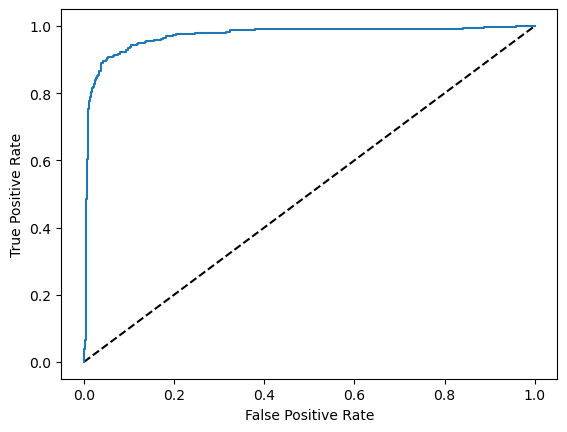

Auc Score :  
 0.9263722324723247


In [68]:
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve

y_pred_prob = Final_Model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test,y_pred_prob)
roc_auc = auc(fpr,tpr)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='Support Vector Classifier(are=%f)'% roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
auc_score = roc_auc_score(Y_test, Final_Model.predict(X_test))
print('Auc Score : ','\n', auc_score)

I have generated the AUC Curve for my final model and it shows the AUC score for my final model to be of 90.5%

## ROC Curve

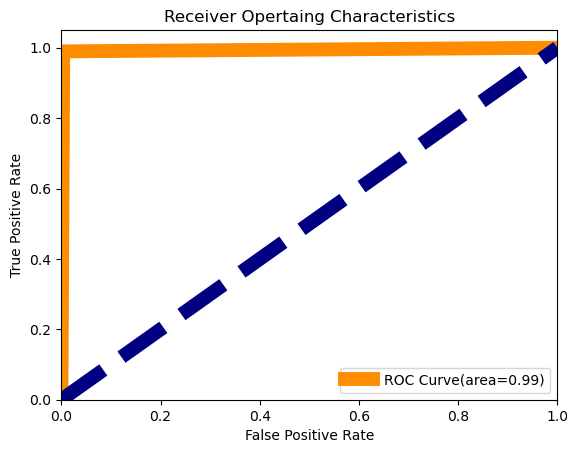

In [69]:
from sklearn.metrics import roc_curve, auc
# Predicting Y_test
pred = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(pred,Y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC Curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='navy', lw=10, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Opertaing Characteristics")
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix

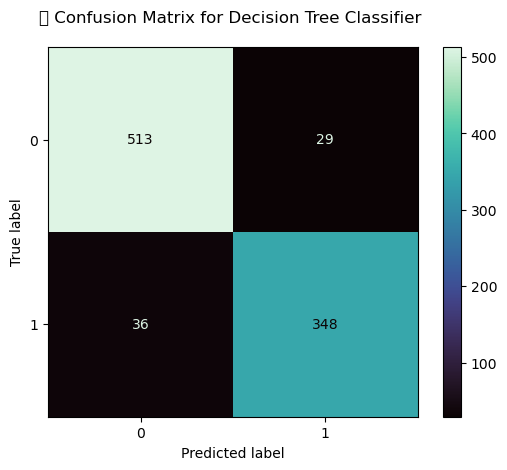

In [70]:
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
plt.show()

With the help of above confusion matrix I am able to understand the number of times I got the correct outputs and the number of times my model missed to provide the correct prediction (depicting in the black boxes)

## Saving the Model

In [71]:
import joblib

In [72]:
#Save the model as a pickle in a file 
filename = "FinalModel_1.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_1.pkl']

Hence, with this succesfully built a Machine Learning Model with best Fit Model SVC